# The Sparks Foundation
# Data Science and Business Analytics Intern Task

## By Ghazali Akmal Rabbani
## Task 3

# Problem and Purpose

1. Perform Exploratory Data Analysis on dataset SampleSuperstore
2. As a business manager, try to find out the weak areas where you can work to make more profit
3. What all business problems you can derive by exploring the data?
4. You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel/SAP/SAS)
5. Dataset : https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Data Extraction

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# General Exploratory Data Analysis

## Summary Statistical Analysis

### Information Analysis

Summary information of each columns in dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Based on the summary information in the above, there are **2 columns with integer type(int64)** and **3 columns with float type (float64)** which denotes **Numerical Column** and **8 columns with object type** which denotes **Categorical Column**. And also there are **9994 data**

### Check for Missing Value

In [4]:
df.isnull().all()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

### Statistical Numerical Analysis

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000




*   **Count** is a total data of each column
*   **Mean** is an average of all the numbers
*   **std** or Standard Deviation is measurement to tell how a set of values spread out from their mean. A low Standard Deviation whows that the values are close to the mean and a high Standard Deviation shows a high diversion from the mean



Create a list of integer column and pass the value to **data_col_integer** variable

In [6]:
data_col_integer = df.select_dtypes(include=['int64']).columns.tolist()
data_col_integer

['Postal Code', 'Quantity']

Create a list of integer column and pass the value to **data_col_float** variable

In [7]:
data_col_float = df.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['Sales', 'Discount', 'Profit']

### Statistical Categorical Analysis

Create a list of categorical column and pass the value to **data_col_category** variable

In [8]:
data_col_category = df.select_dtypes(include=['object']).columns.tolist()
data_col_category

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

Indexing and selecting column with categorical value from main dataframe. And pass the value to **data_categorical** variable

In [9]:
data_categorical = df[data_col_category]
data_categorical

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


The result of Categorical Analysis from each categorical column in dataframe

In [10]:
data_categorical.describe()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523




*   **count** is total data of each column
*   **unique** is total of unique data in each column.
*   **top** is the most frequency or mode data in each column
*   **freq** is total of top data or mode data in each column.



## Create Boxplot Function

## Univariate Analysis

In [11]:
def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical]).set_title(numerical)
    median = df[numerical].median()
    FirstQuartile = df[numerical].quantile(0.25)
    ThirdQuartile = df[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(df[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical], showfliers = False).set_title(numerical + ' No Outliers')

### Integer Univariate Analysis

### Postal Code Boxplot

Statistical Data Summary
Median :  56430.5
1st Quartile :  23223.0
3rd Quartile :  90008.0
IQR :  66785.0
Upper Fence :  190185.5
Lower Fence :  -76954.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


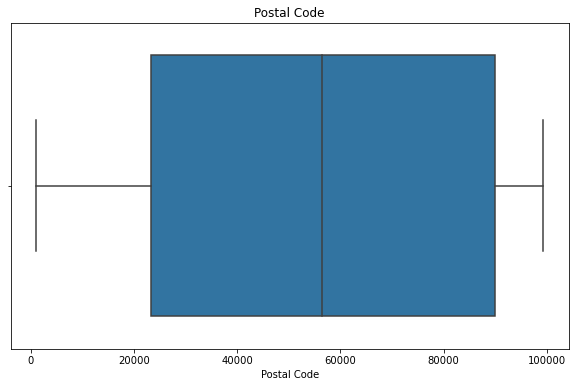

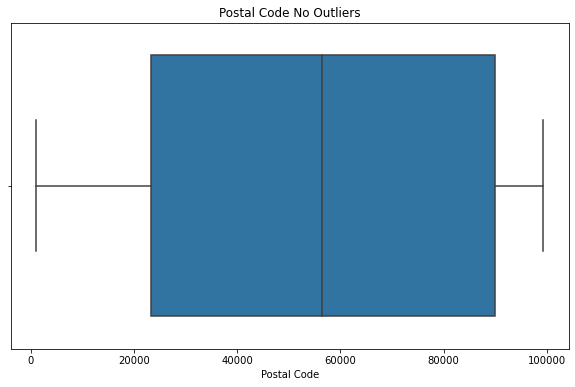

In [12]:
boxplot_numerical(data_col_integer[0])

### Quantity Boxplot

Statistical Data Summary
Median :  3.0
1st Quartile :  2.0
3rd Quartile :  5.0
IQR :  3.0
Upper Fence :  9.5
Lower Fence :  -2.5

Outliers Data Detection
Upper Outliers Data :  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


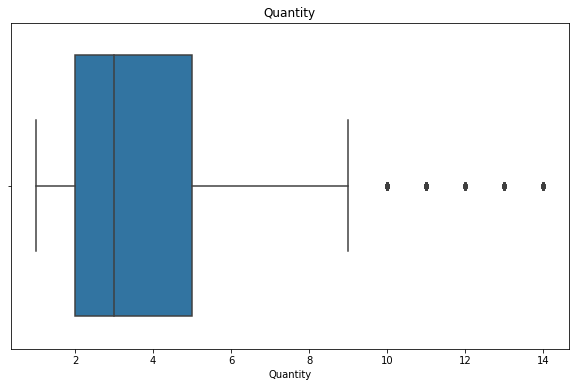

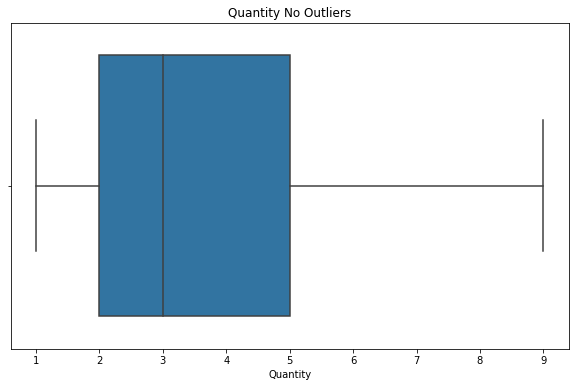

In [13]:
boxplot_numerical(data_col_integer[1])

## Float Univariate Analysis

### Sales Boxplot

Statistical Data Summary
Median :  54.489999999999995
1st Quartile :  17.28
3rd Quartile :  209.94
IQR :  192.66
Upper Fence :  498.93
Lower Fence :  -271.71000000000004

Outliers Data Detection
Upper Outliers Data :  [499.168, 499.584, 499.95, 499.98, 499.99, 500.24, 501.81, 501.81, 501.81, 502.488, 503.96, 503.96, 503.96, 503.96, 503.96, 504.9, 504.9, 505.176, 505.32, 506.28, 508.704, 508.768, 509.488, 509.9575, 509.97, 510.24, 511.056, 511.5, 511.84, 512.19, 512.358, 512.499, 512.94, 512.96, 513.024, 514.165, 515.88, 516.488, 516.96, 517.405, 517.5, 517.9, 518.272, 519.68, 519.792, 519.96, 520.05, 520.464, 520.464, 521.96, 521.96, 523.25, 523.26, 523.392, 523.48, 523.764, 523.764, 523.92, 523.92, 526.344, 526.45, 526.45, 526.582, 527.92, 528.43, 528.43, 528.43, 529.9, 530.34, 532.3992, 532.704, 532.704, 532.72, 533.94, 535.41, 535.41, 535.41, 535.41, 537.544, 537.544, 538.194, 538.92, 539.658, 539.91, 539.92, 539.964, 539.964, 539.97, 539.97, 540.048, 540.048, 540.57, 540.57, 541.24

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


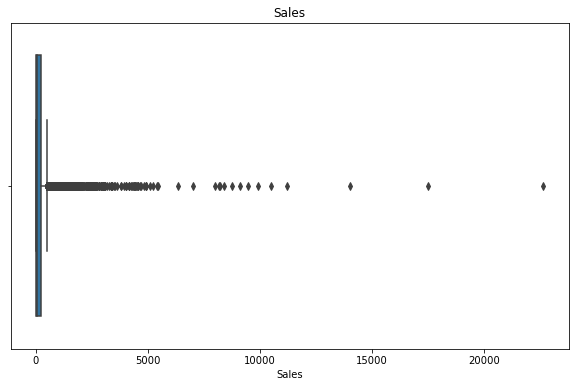

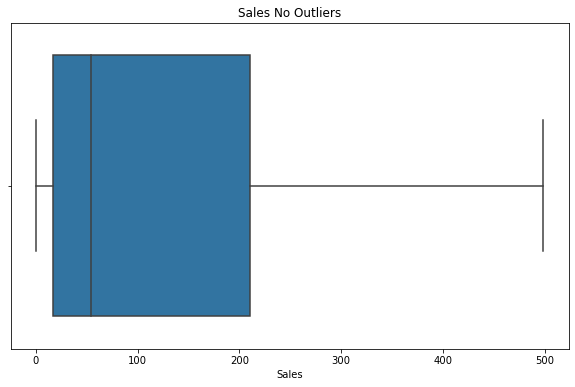

In [14]:
boxplot_numerical(data_col_float[0])

### Discount Boxplot

Statistical Data Summary
Median :  0.2
1st Quartile :  0.0
3rd Quartile :  0.2
IQR :  0.2
Upper Fence :  0.5
Lower Fence :  -0.30000000000000004

Outliers Data Detection
Upper Outliers Data :  [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


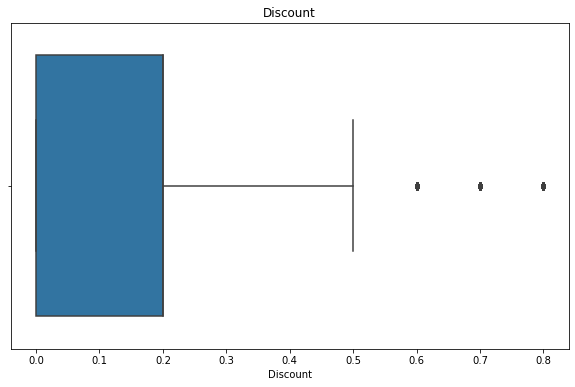

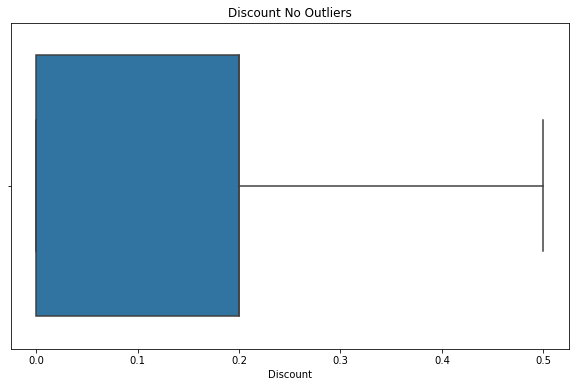

In [15]:
boxplot_numerical(data_col_float[1])

### Profit Boxplot

Statistical Data Summary
Median :  8.6665
1st Quartile :  1.72875
3rd Quartile :  29.364
IQR :  27.63525
Upper Fence :  70.816875
Lower Fence :  -39.724125

Outliers Data Detection
Upper Outliers Data :  [70.9644, 70.98, 71.162, 71.2296, 71.2296, 71.2476, 71.2692, 71.2692, 71.3898, 71.5375, 71.772, 71.772, 71.928, 71.97, 71.99, 71.99, 71.991, 71.991, 71.9928, 71.9952, 72.358, 72.432, 72.432, 72.5344, 72.5344, 72.5754, 72.6408, 72.6408, 72.7888, 72.807, 72.8088, 72.8946, 72.948, 72.975, 73.194, 73.194, 73.321, 73.41, 73.41, 73.41, 73.41, 73.41, 73.5448, 74.0532, 74.213, 74.5654, 74.574, 74.574, 74.691, 74.8098, 74.8098, 74.8142, 74.8142, 74.8142, 74.8142, 74.8524, 74.975, 74.975, 74.9985, 75.168, 75.18, 75.18, 75.3732, 75.49, 75.5424, 75.5748, 75.5937, 75.5958, 75.6548, 75.6624, 75.68, 75.68, 75.686, 75.6952, 75.735, 75.9696, 75.9924, 76.0116, 76.0878, 76.0878, 76.1125, 76.2525, 76.2525, 76.2624, 76.272, 76.272, 76.3152, 76.4, 76.47, 76.5484, 76.5583, 76.6395, 76.6395, 76.6395, 76.704, 

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


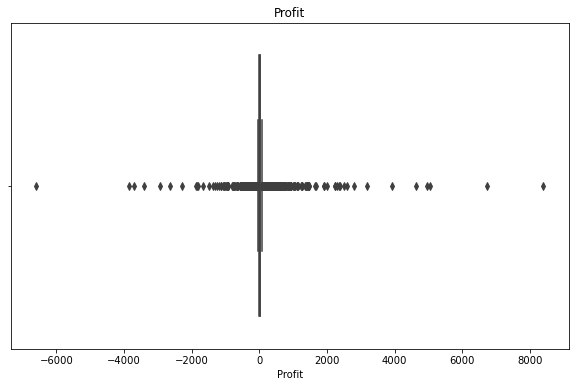

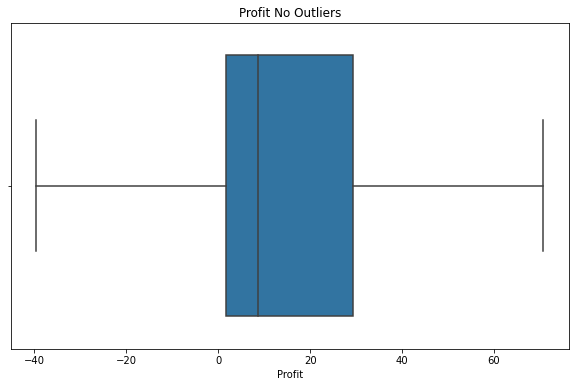

In [16]:
boxplot_numerical(data_col_float[2])

## Barplot Function

## Visualization Analysis

In [17]:
def barplot_analysis(data):
    barplot_data = df[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title( data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )
    
    plt.figure(figsize=(15,8))
    smallest5 = barplot_data.nsmallest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = smallest5,
        order = smallest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Least 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

### Visualization Numerical Analysis

#### Postal Code Analysis

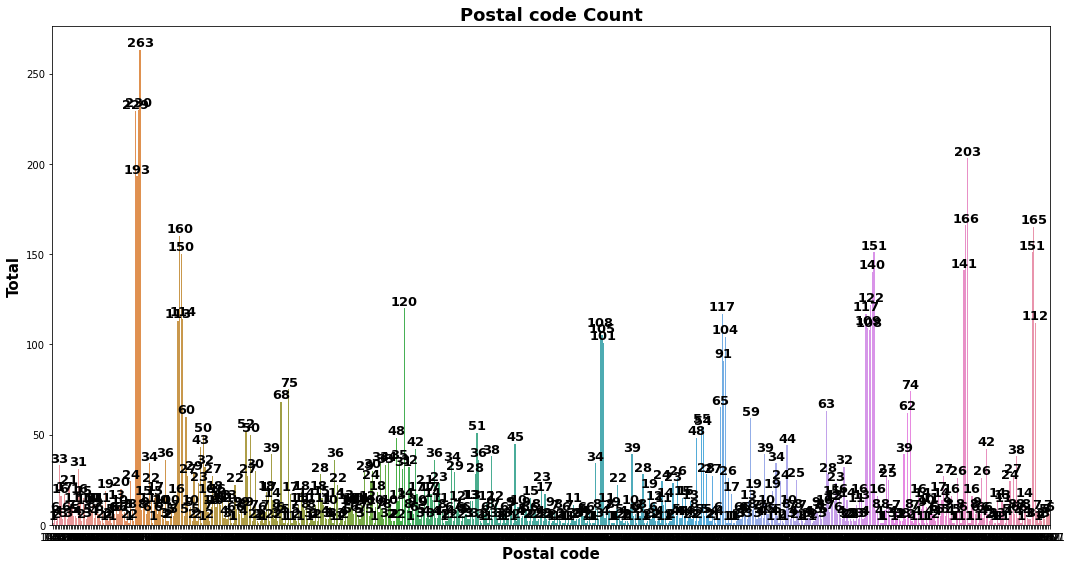

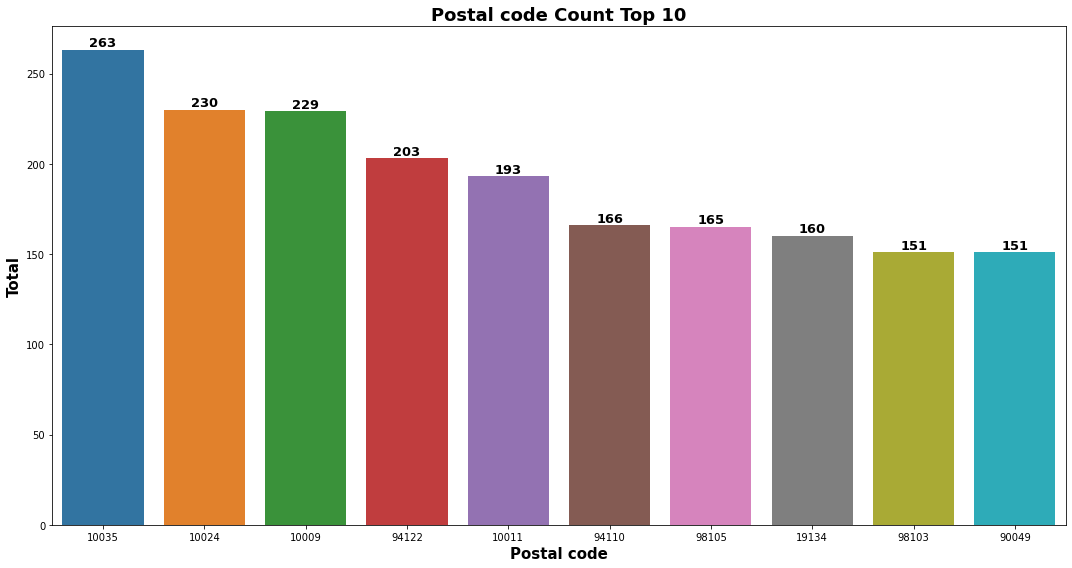

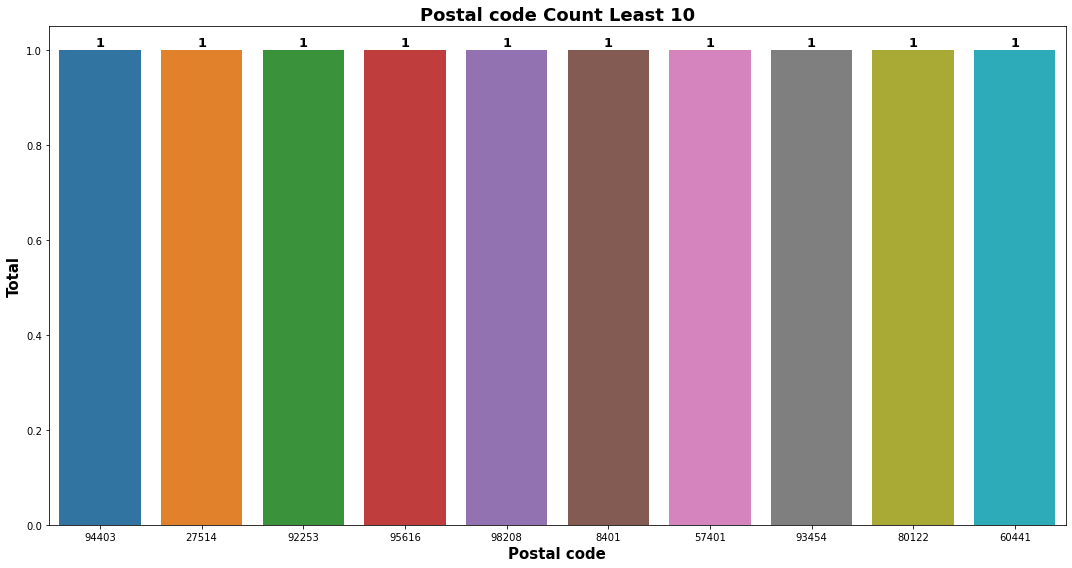

In [18]:
barplot_analysis(data_col_integer[0])

#### Quantity Analysis

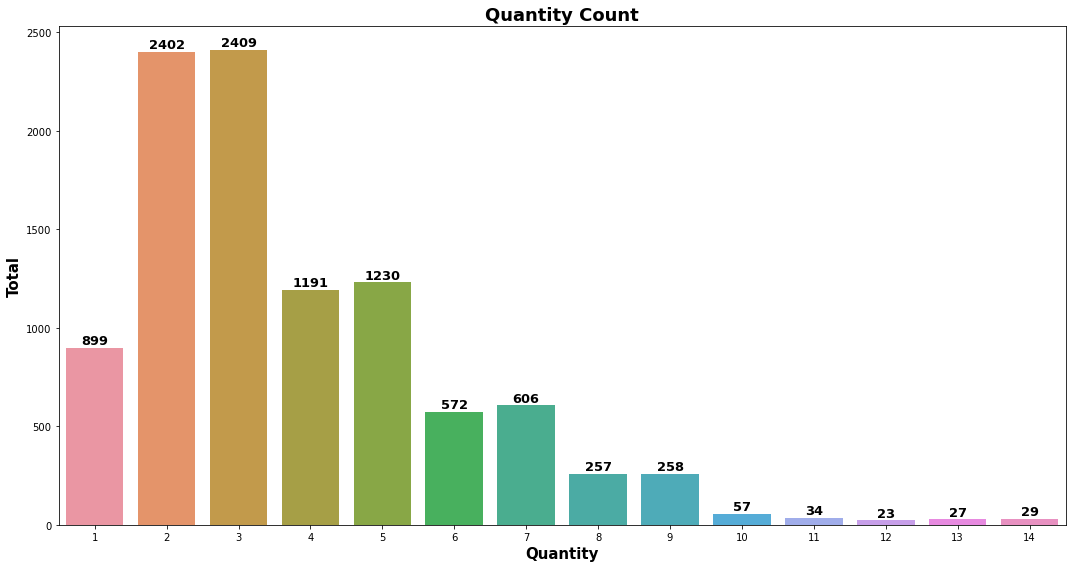

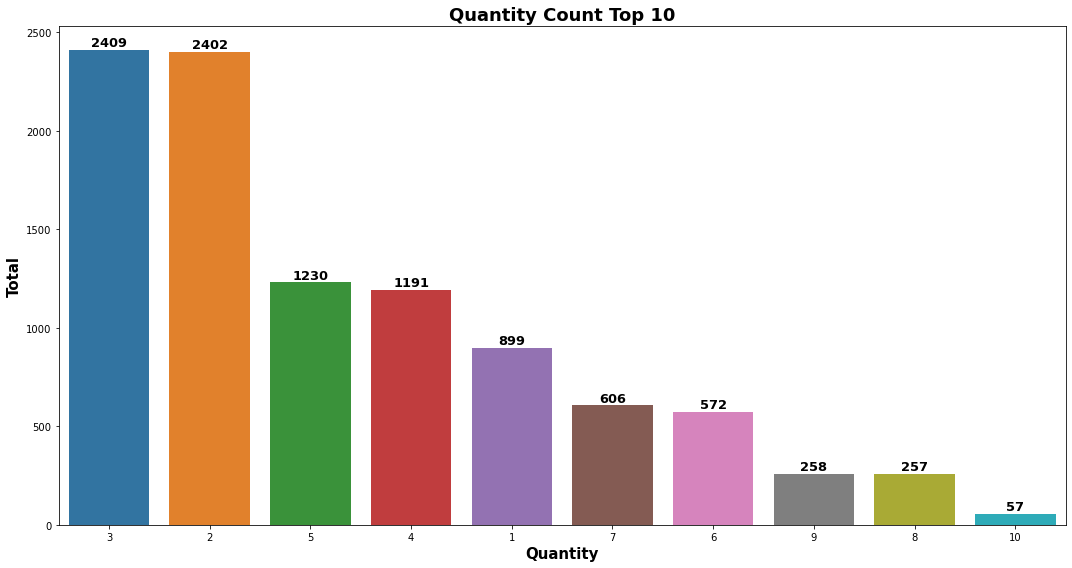

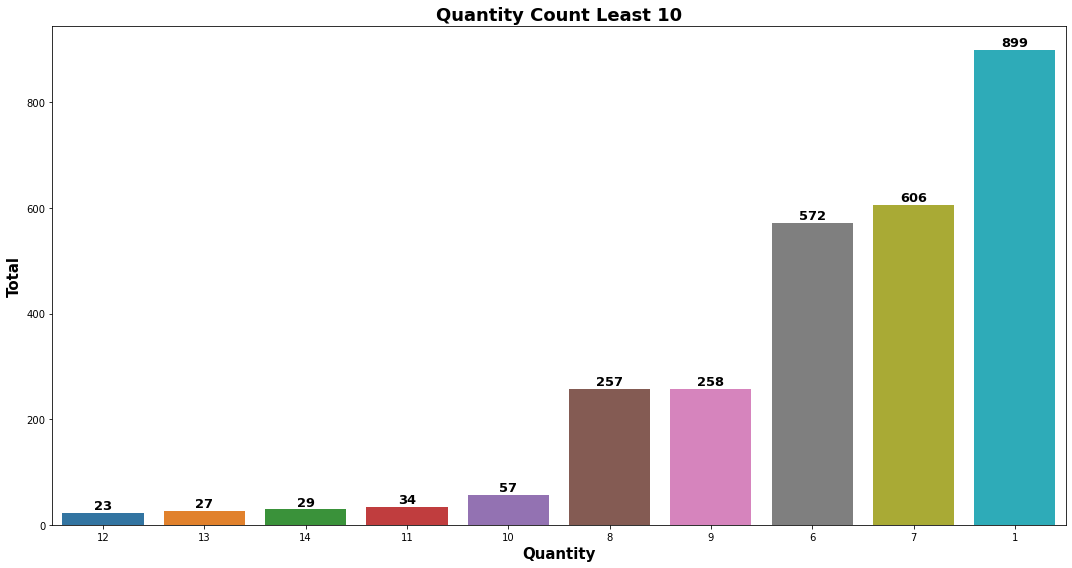

In [19]:
barplot_analysis(data_col_integer[1])

### Visualization Float Analysis

#### Sales Analysis

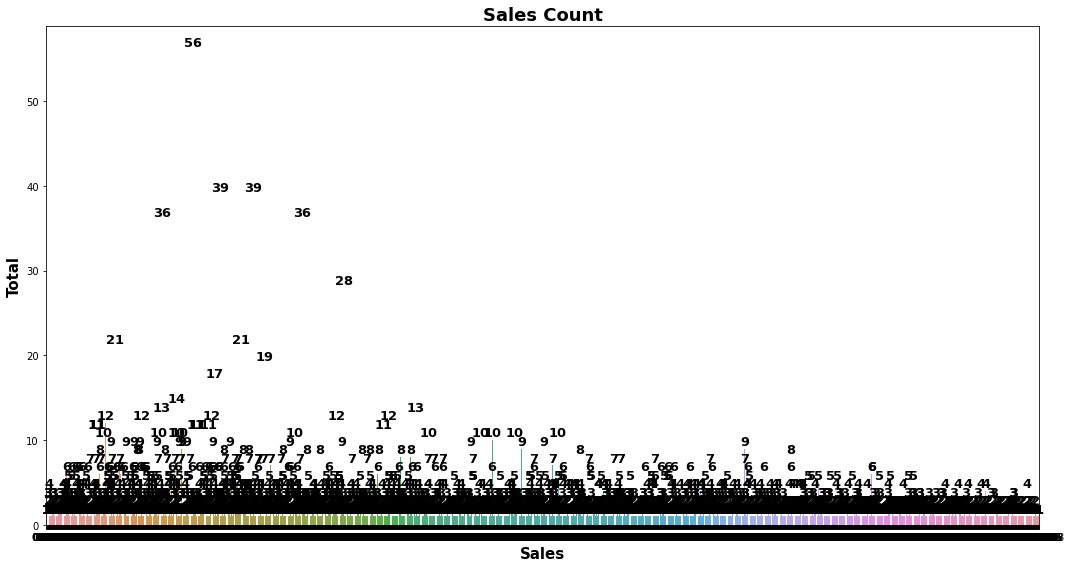

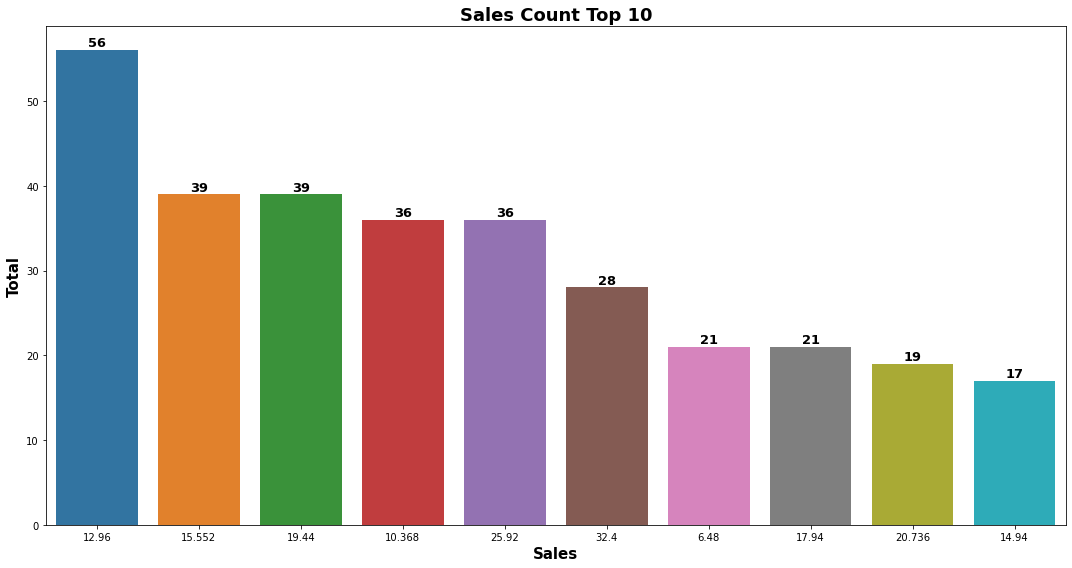

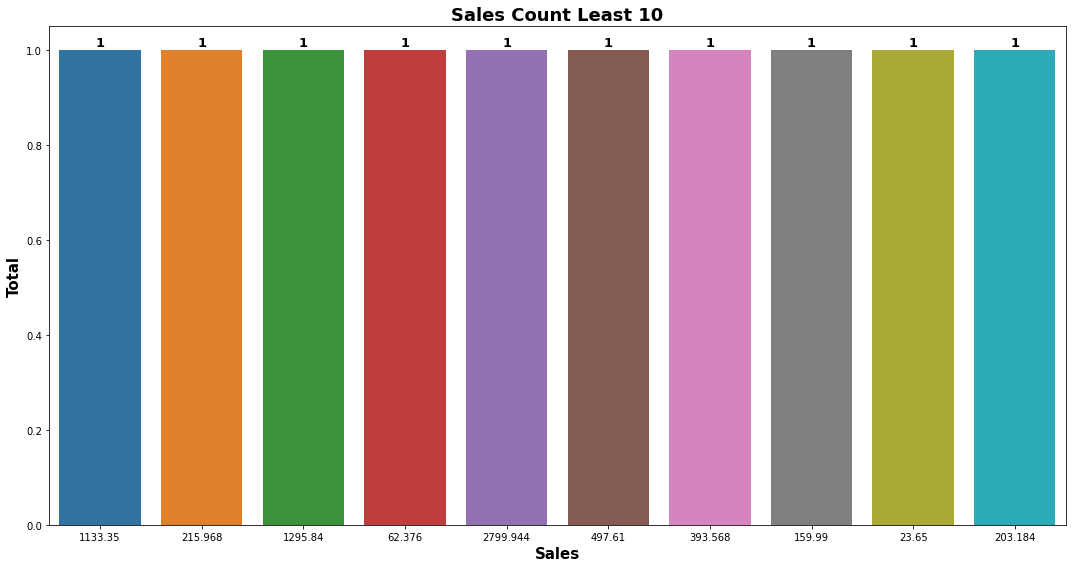

In [20]:
barplot_analysis(data_col_float[0])

#### Discount Analysis

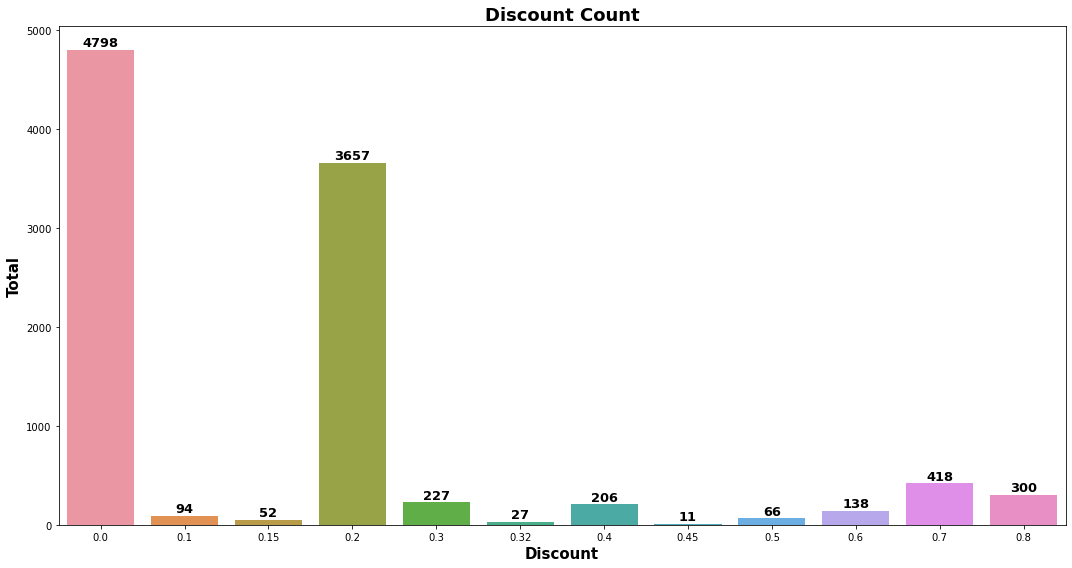

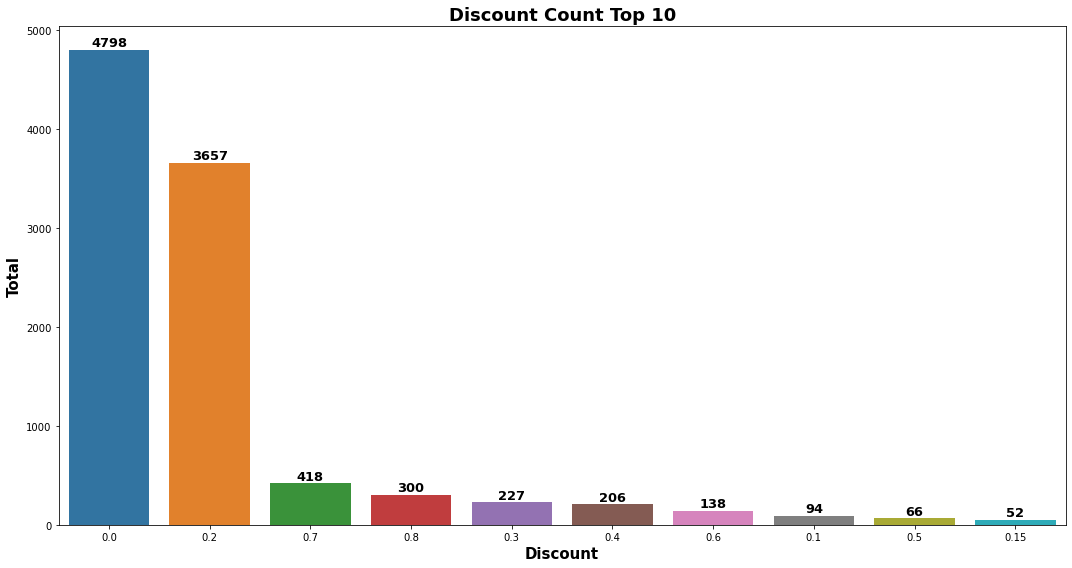

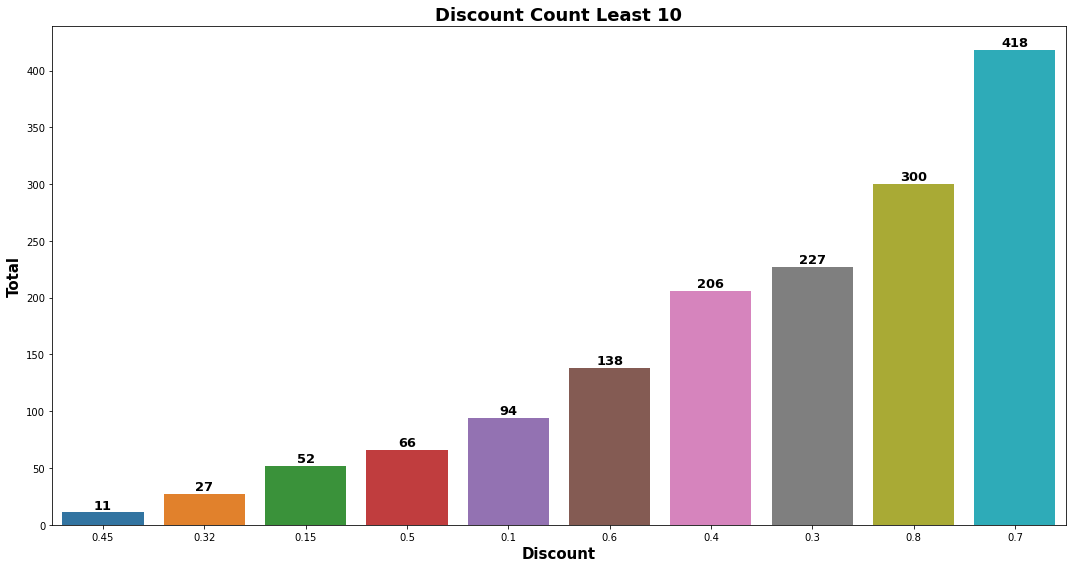

In [21]:
barplot_analysis(data_col_float[1])

#### Profit Analysis

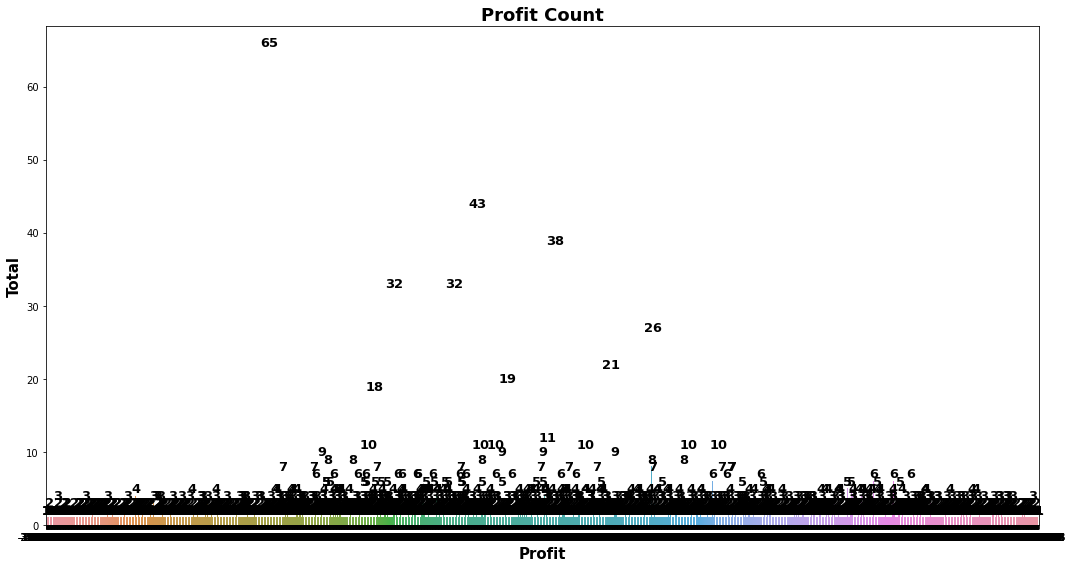

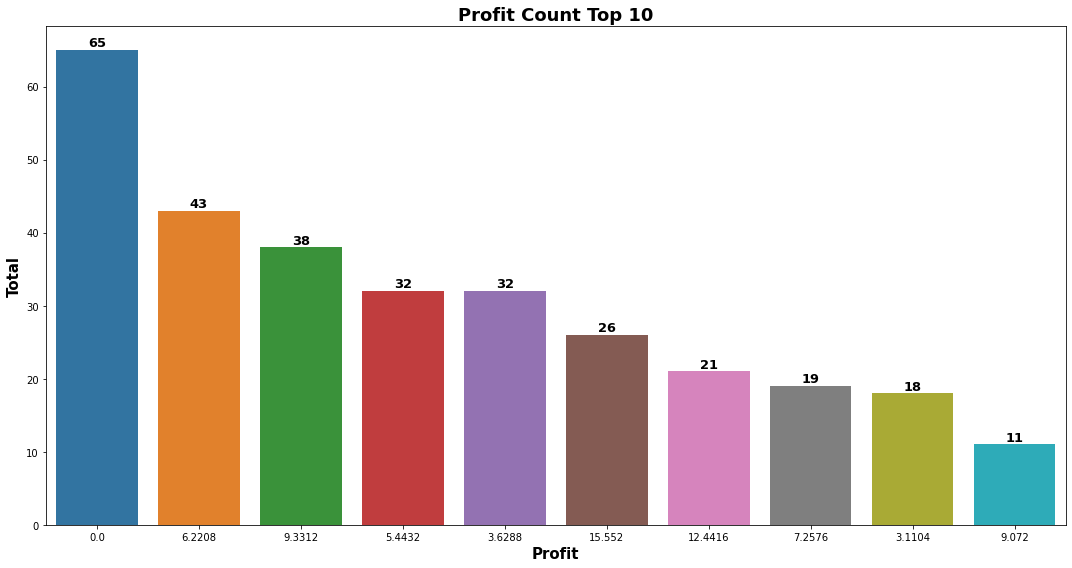

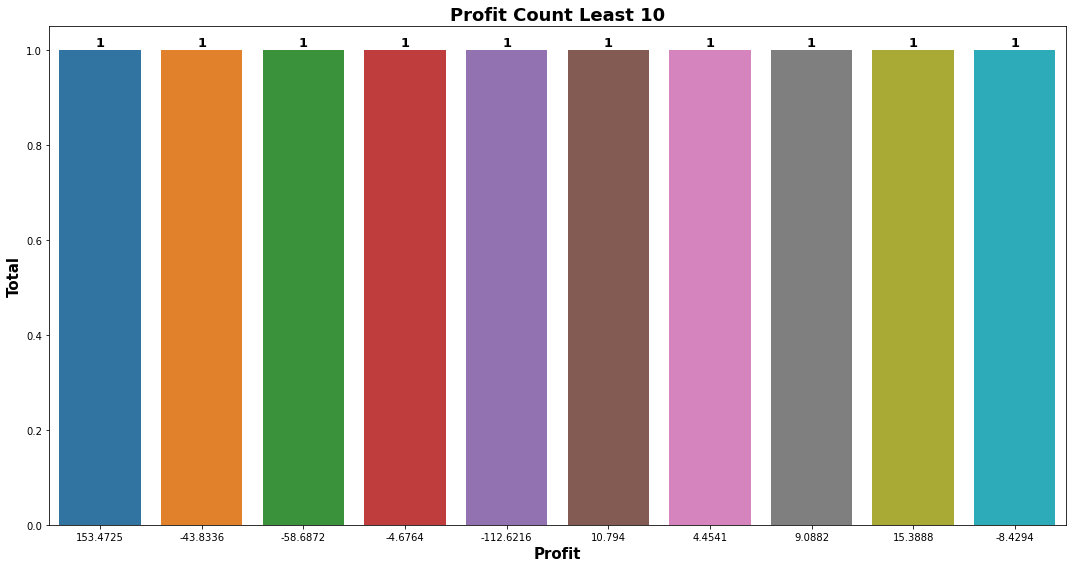

In [22]:
barplot_analysis(data_col_float[2])

### Visualization Categorical Analysis

#### Ship mode Analysis

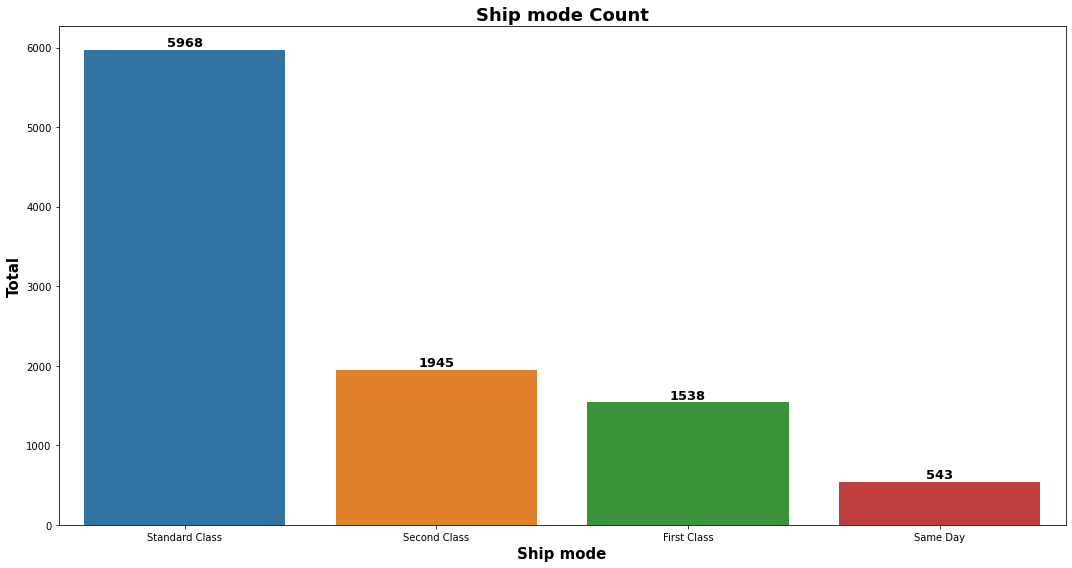

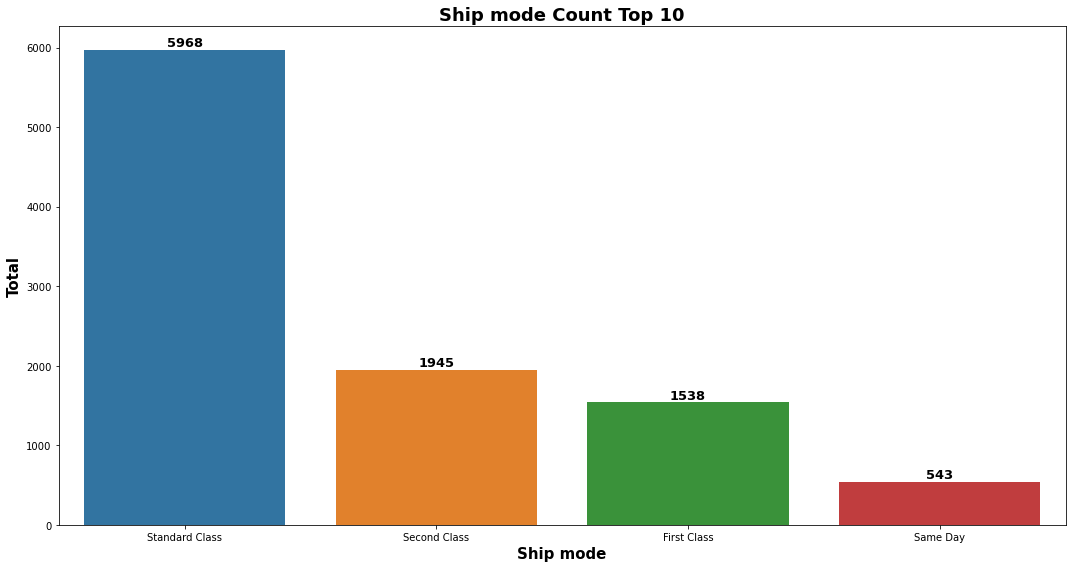

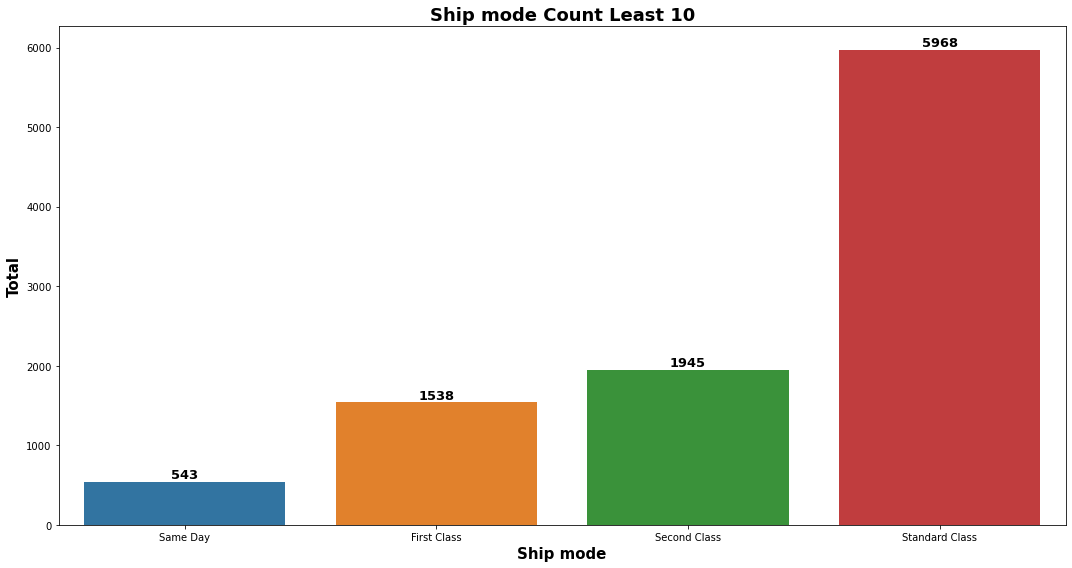

In [23]:
barplot_analysis(data_col_category[0])

#### Segment Analysis

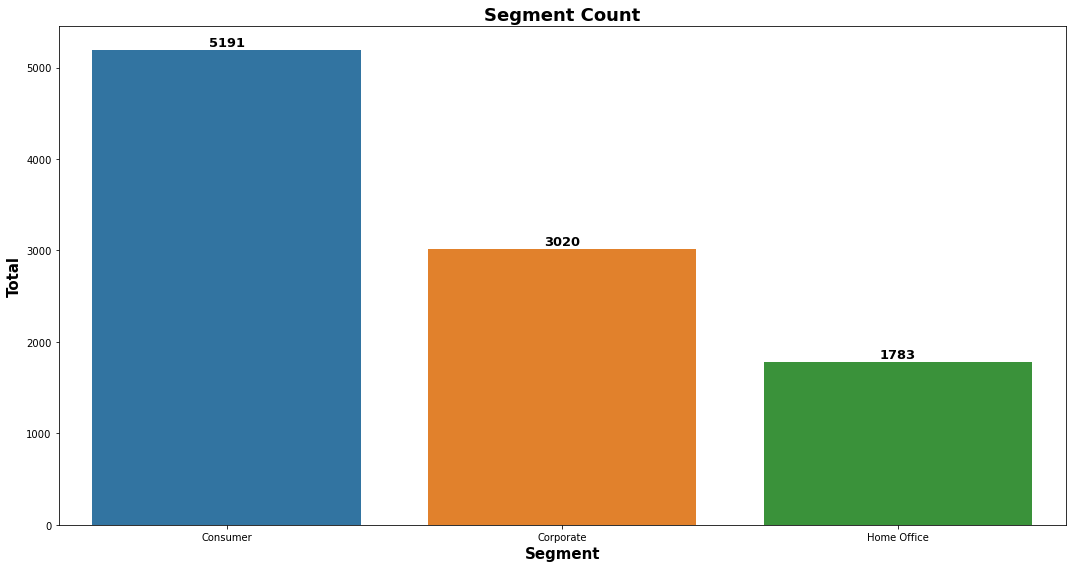

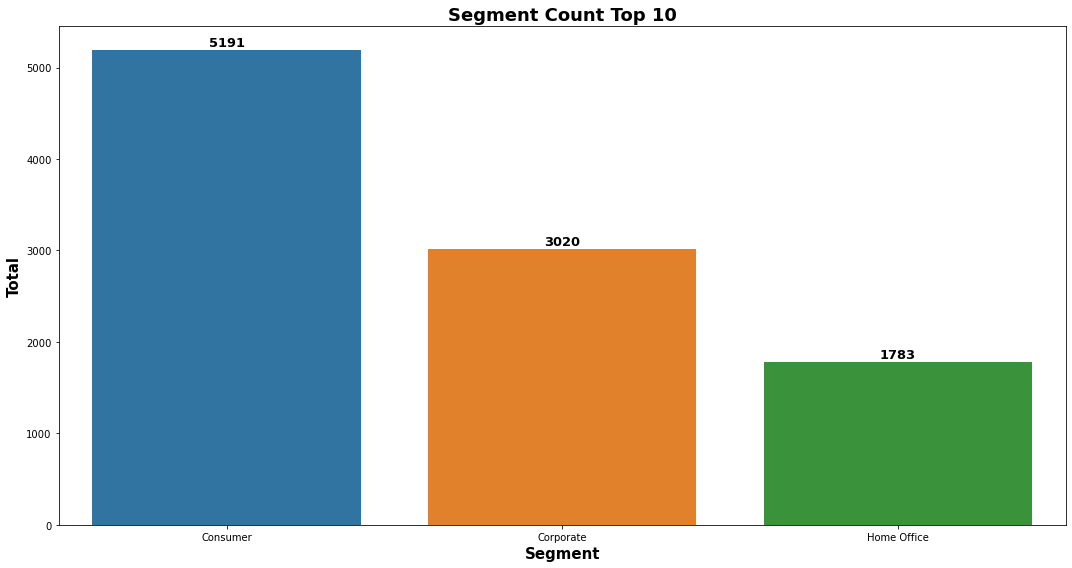

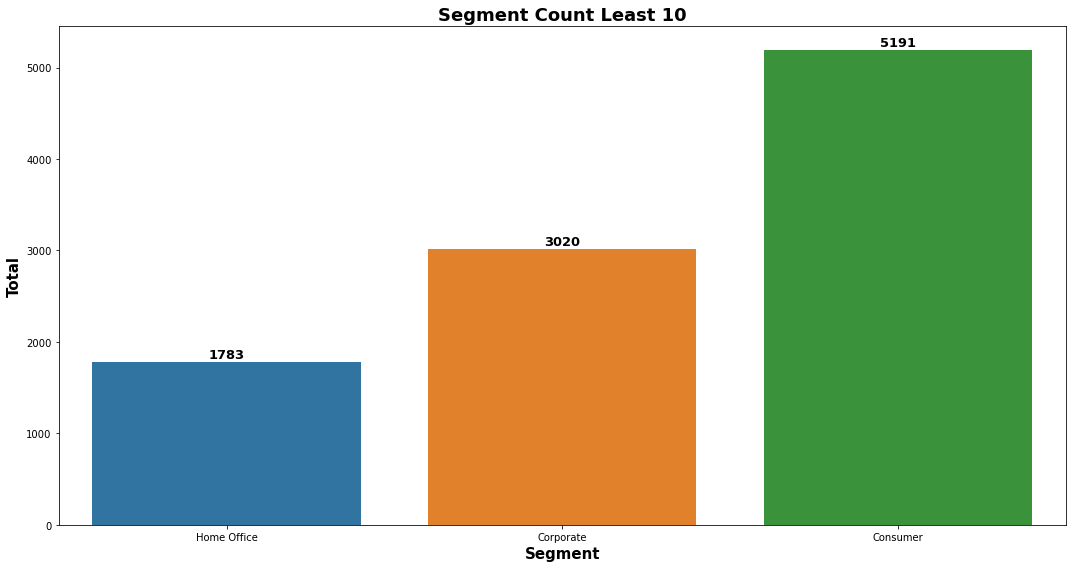

In [24]:
barplot_analysis(data_col_category[1])

#### Country Analysis

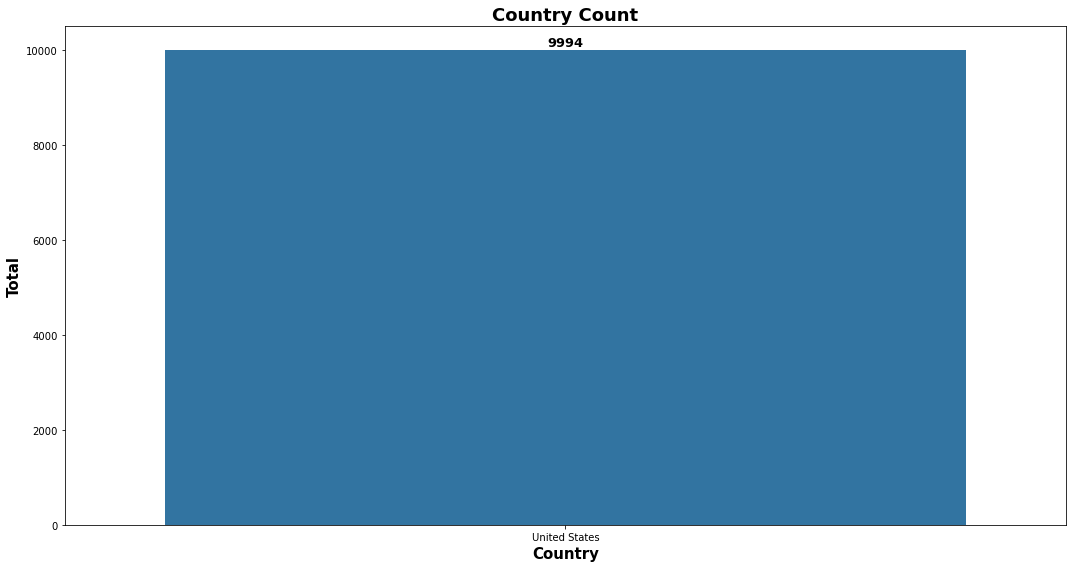

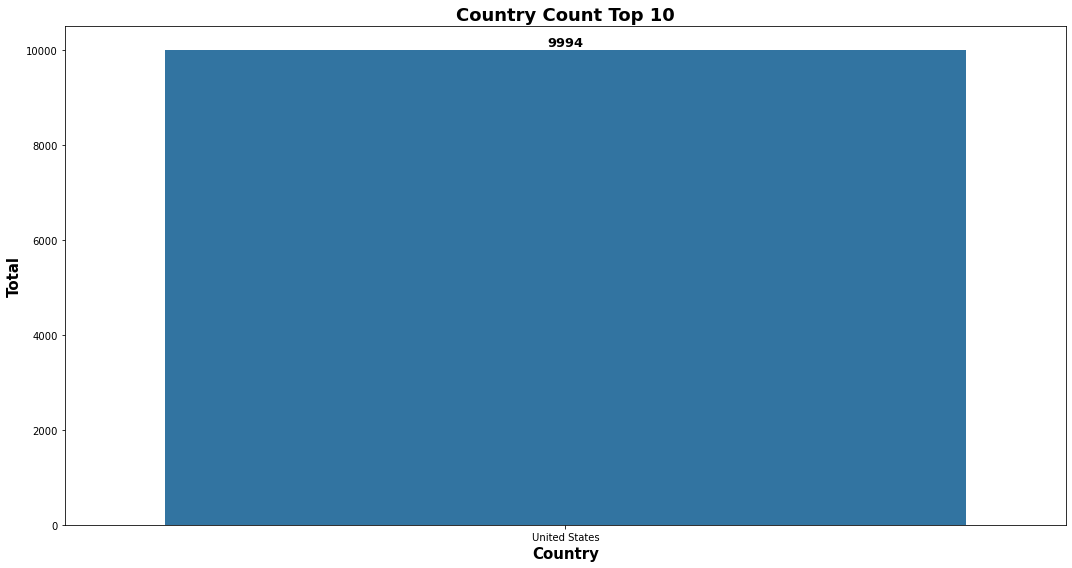

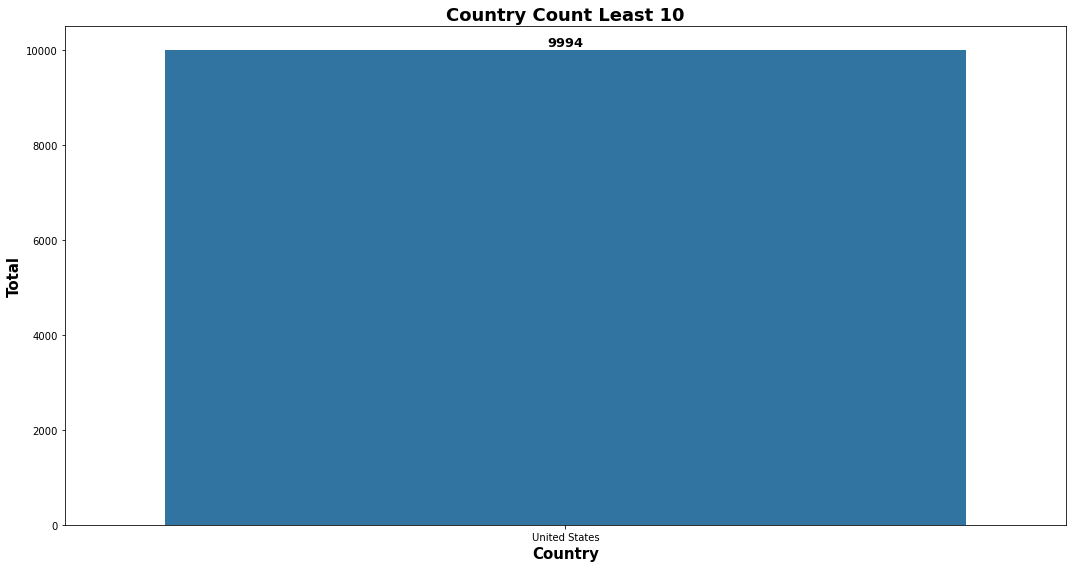

In [25]:
barplot_analysis(data_col_category[2])

#### City Analysis

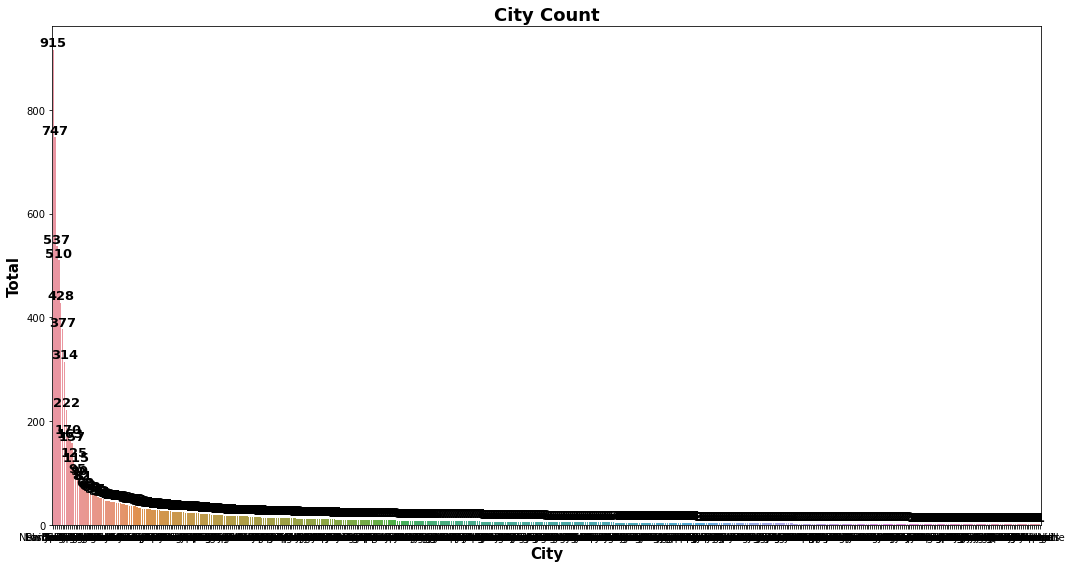

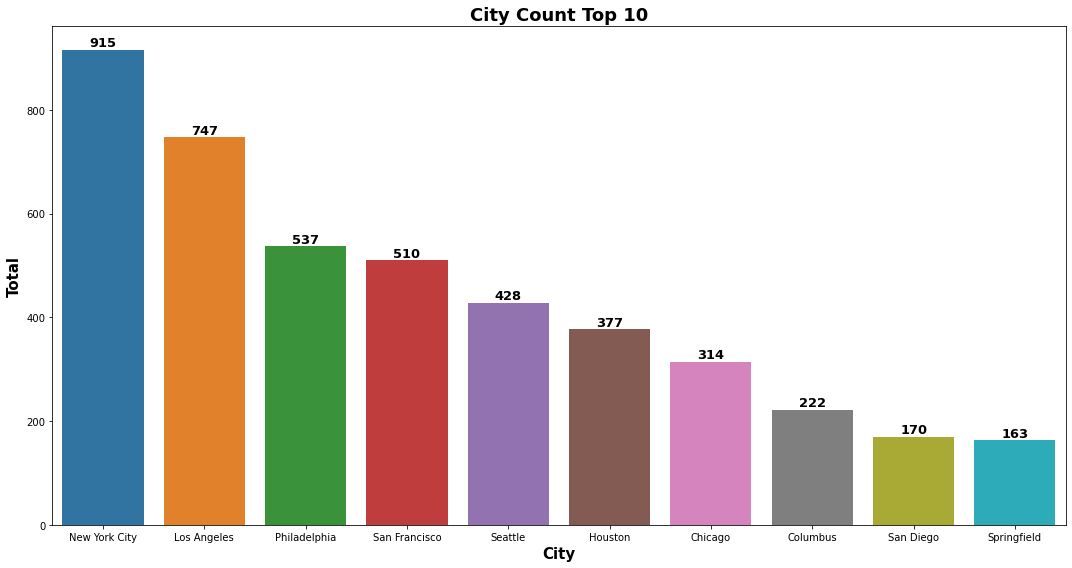

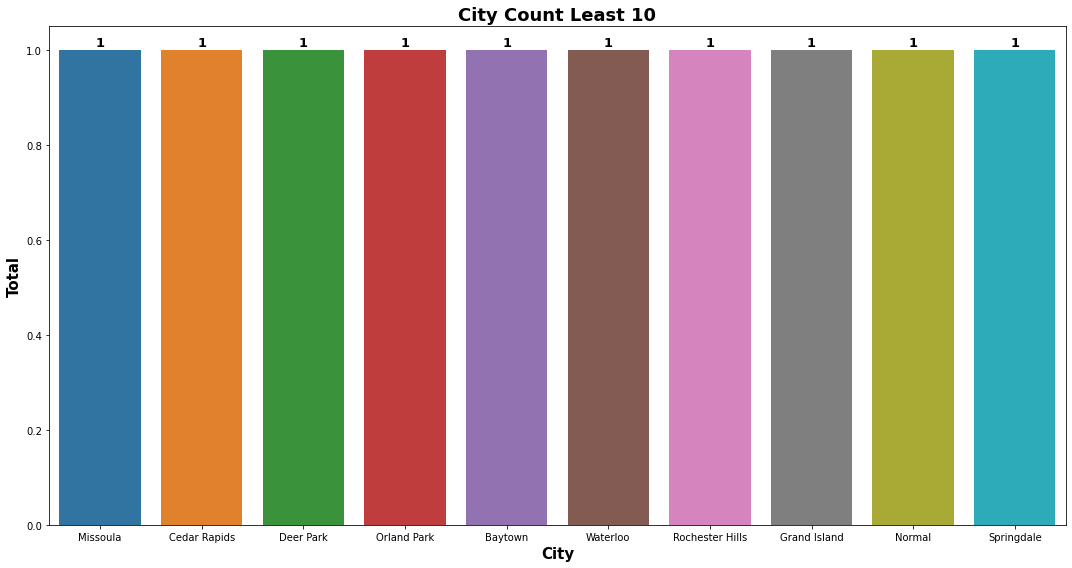

In [26]:
barplot_analysis(data_col_category[3])

#### State Analysis

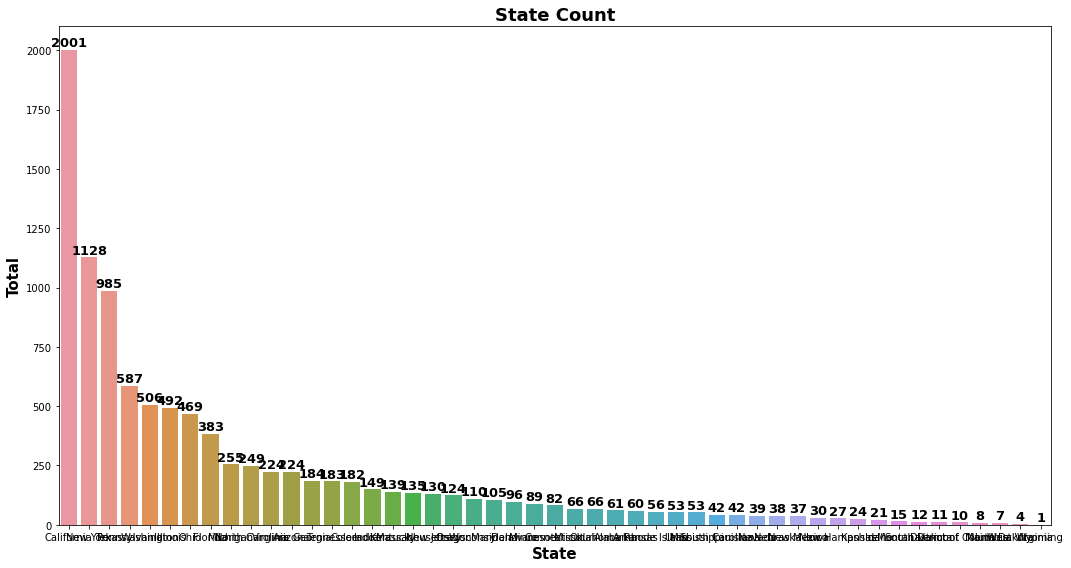

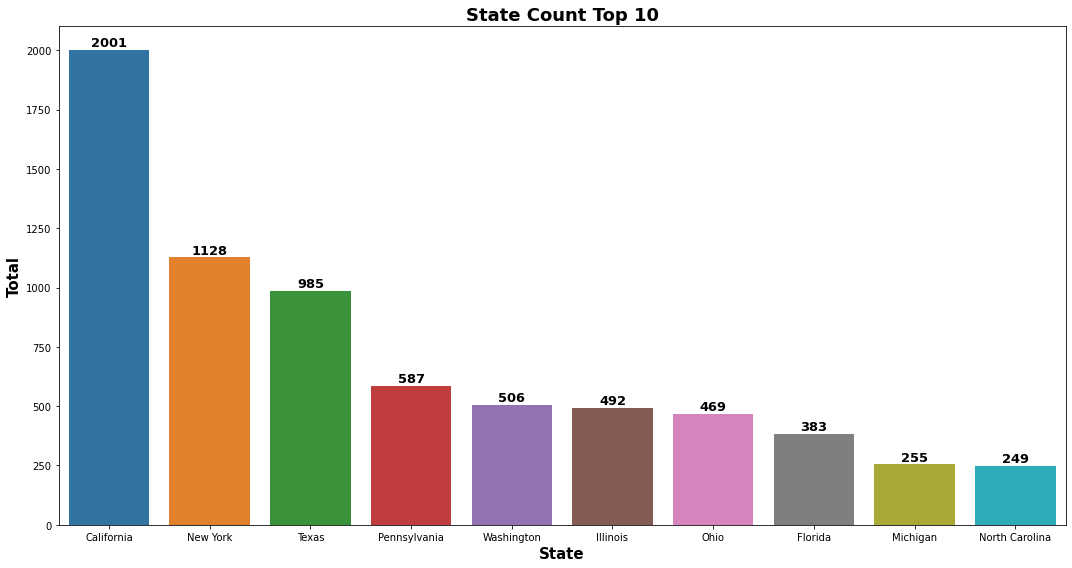

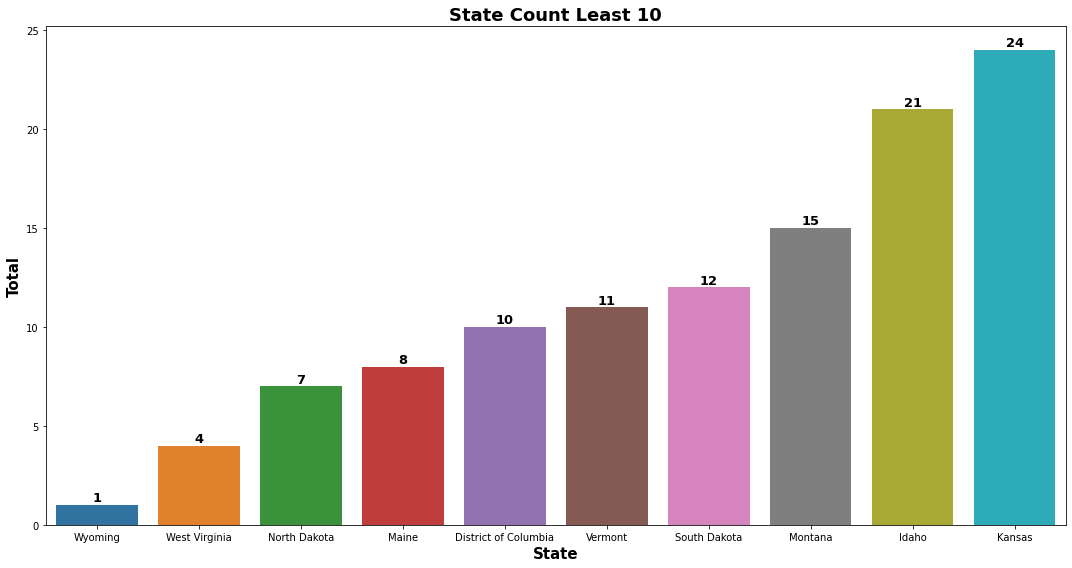

In [27]:
barplot_analysis(data_col_category[4])

#### Region Analysis

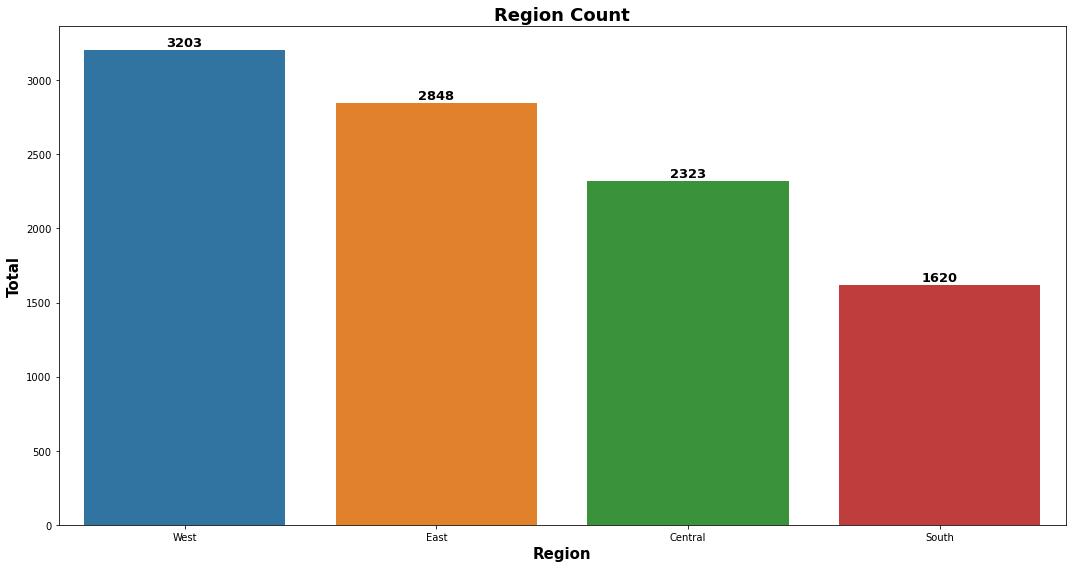

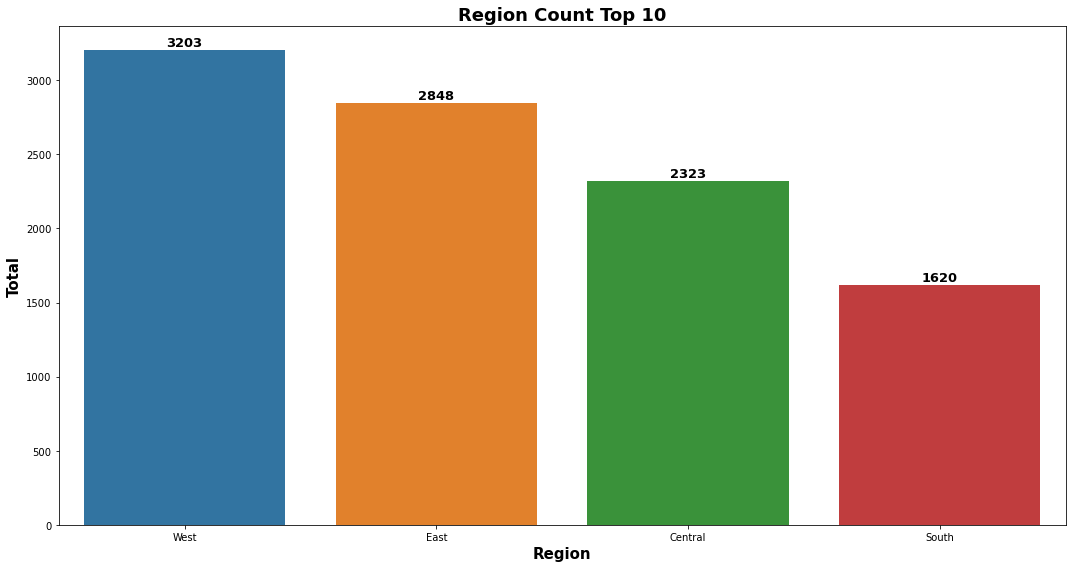

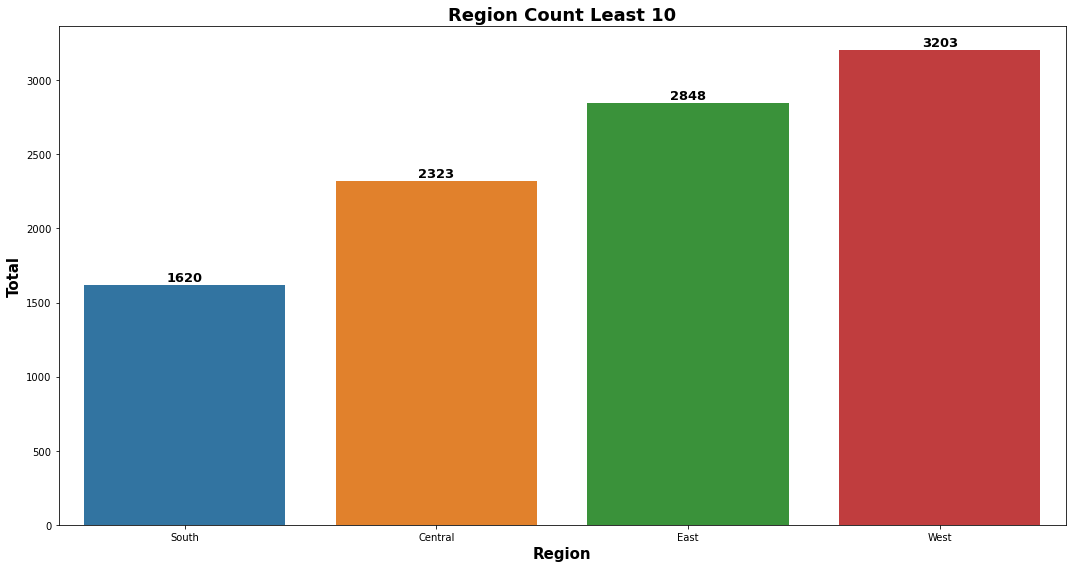

In [28]:
barplot_analysis(data_col_category[5])

#### Category Analysis

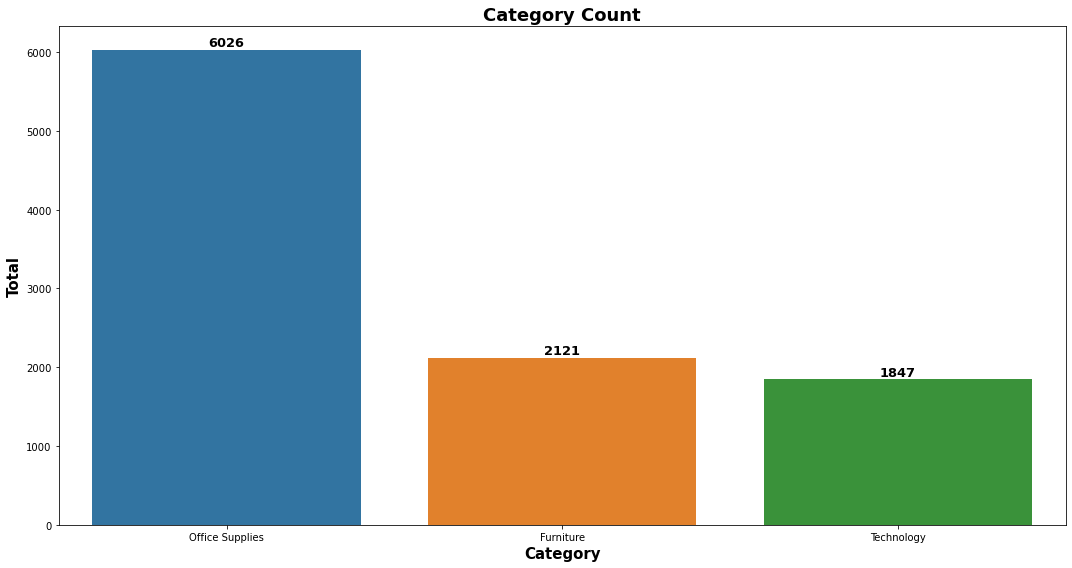

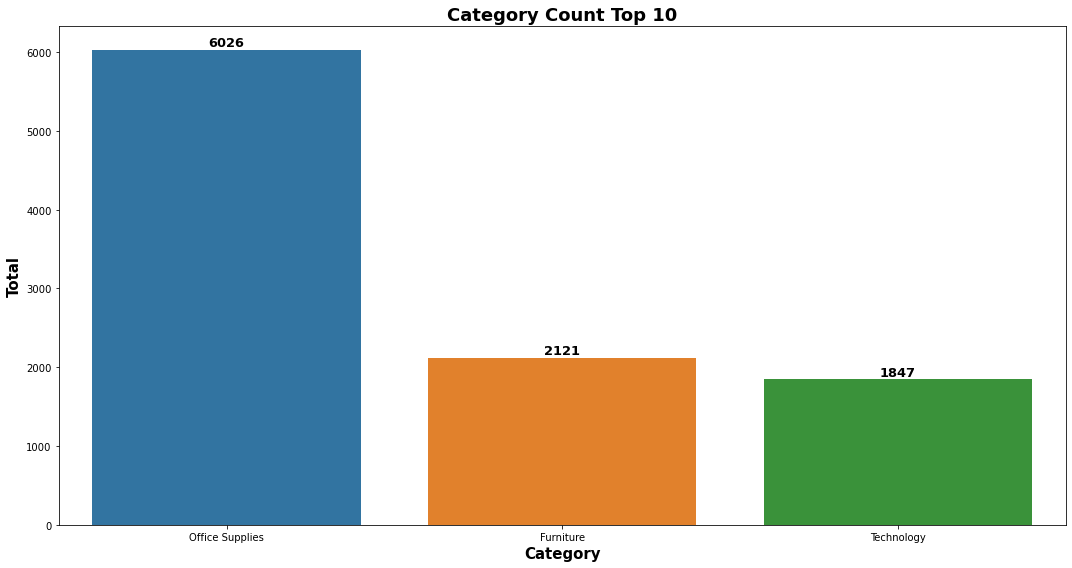

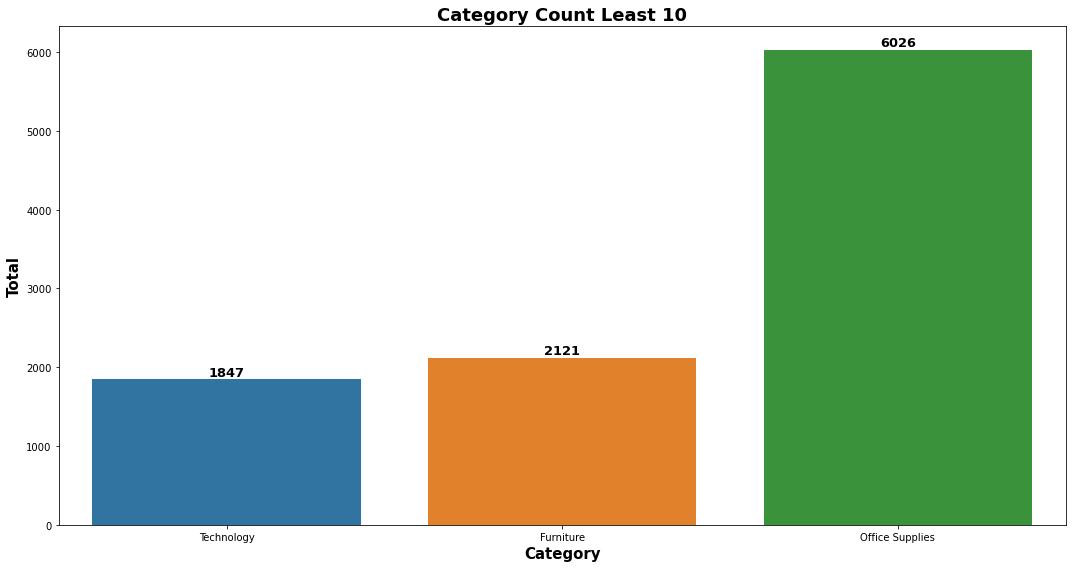

In [29]:
barplot_analysis(data_col_category[6])

#### Sub-Category Analysis

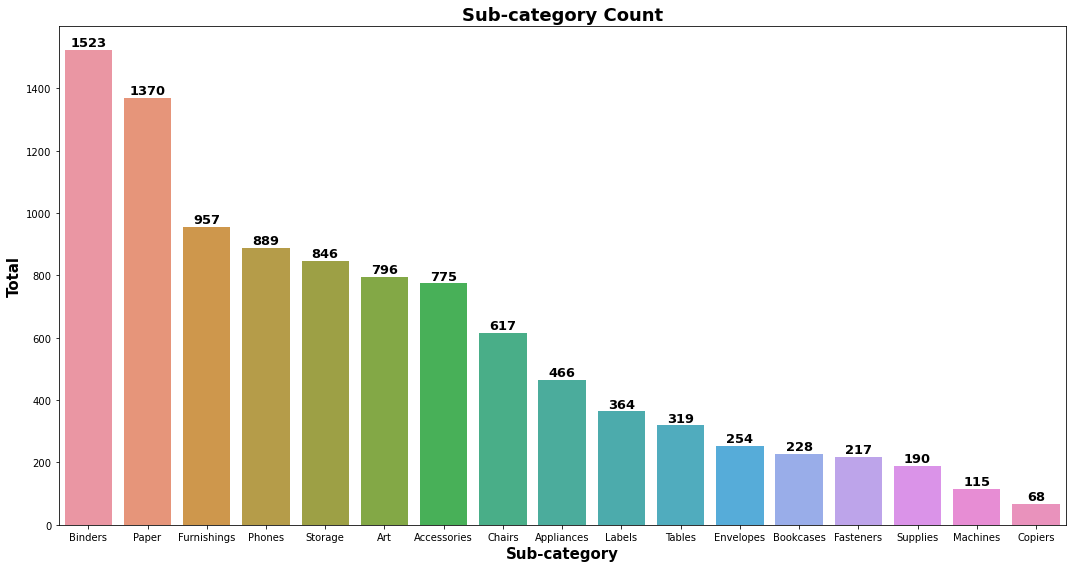

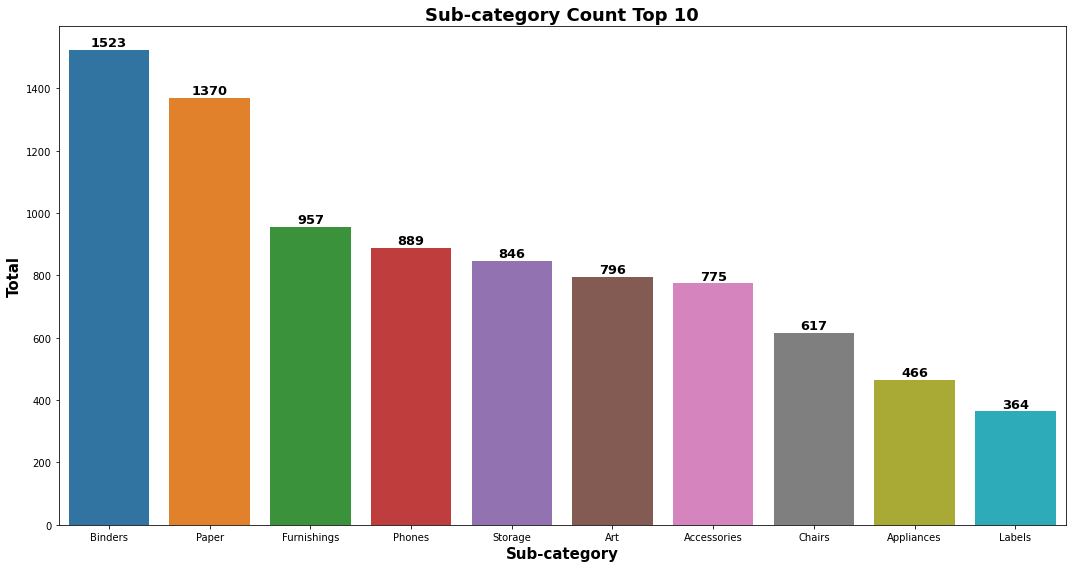

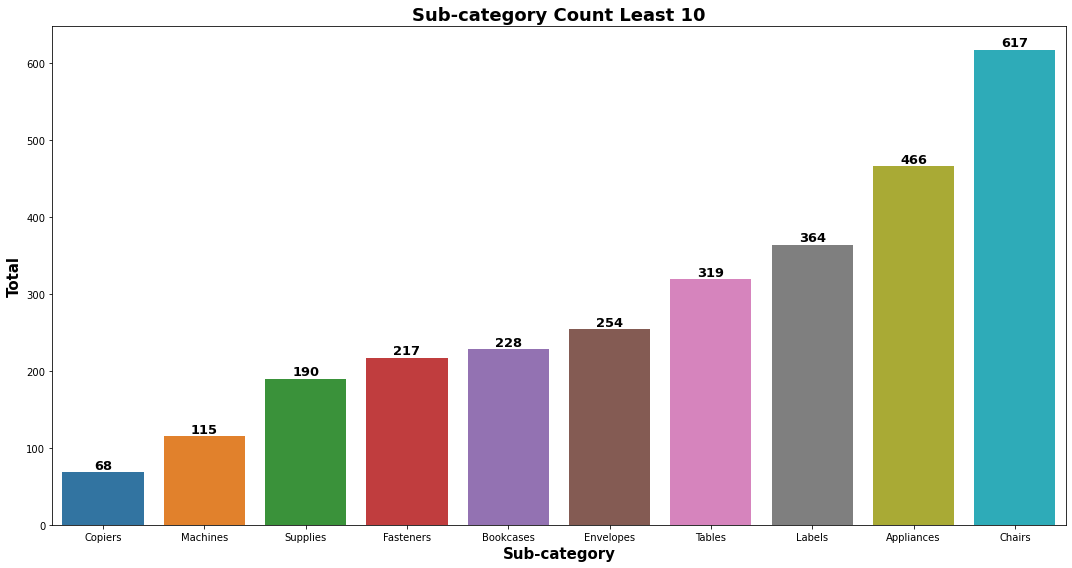

In [30]:
barplot_analysis(data_col_category[7])

# Specific Exploratory Data Analysis on Profit is more than 0

Do Exploratory Data Analysis when Profit is more than 0

## Get New DataFrame where Profit is more than 0

In [31]:
dfPositiveProfit = df[df['Profit'] > 0.0]
dfPositiveProfit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


## Create new Barplot Analysis

In [32]:
def barplot_analysis_dfPositiveProfit(data):
    barplot_data = dfPositiveProfit[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title( data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

## Recall the list of Column

In [33]:
data_col_integer

['Postal Code', 'Quantity']

In [34]:
data_col_float

['Sales', 'Discount', 'Profit']

In [35]:
data_col_category

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

## Find how much discount which make profit

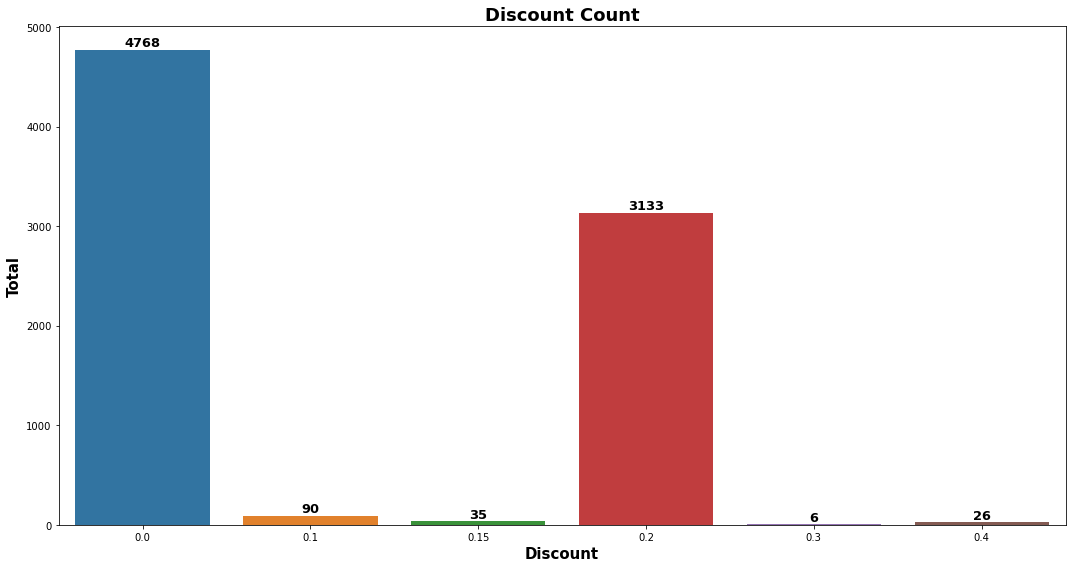

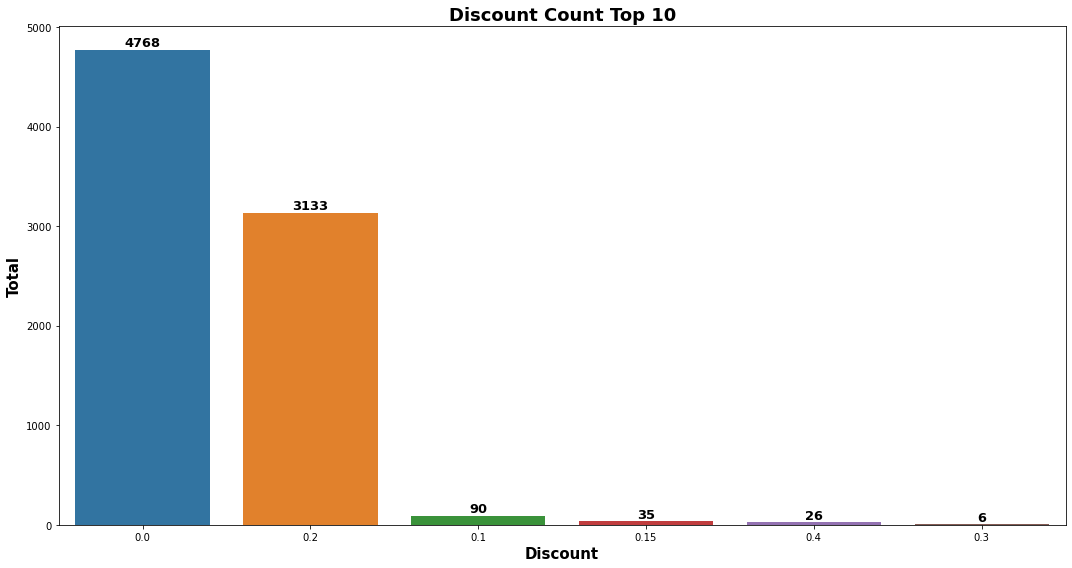

In [36]:
barplot_analysis_dfPositiveProfit(data_col_float[1])

## Find sub-category which sold the most when get the profits

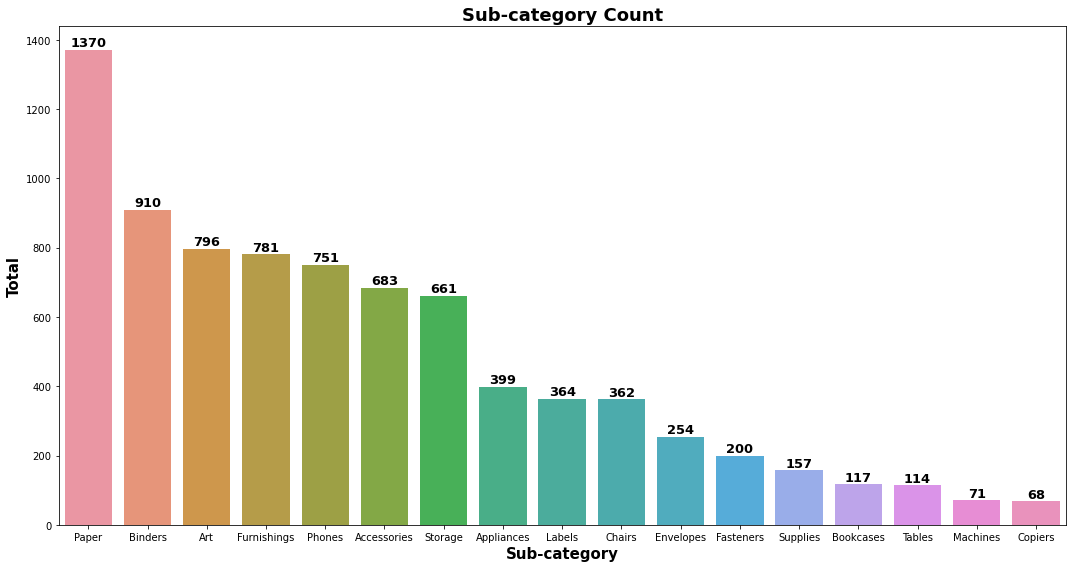

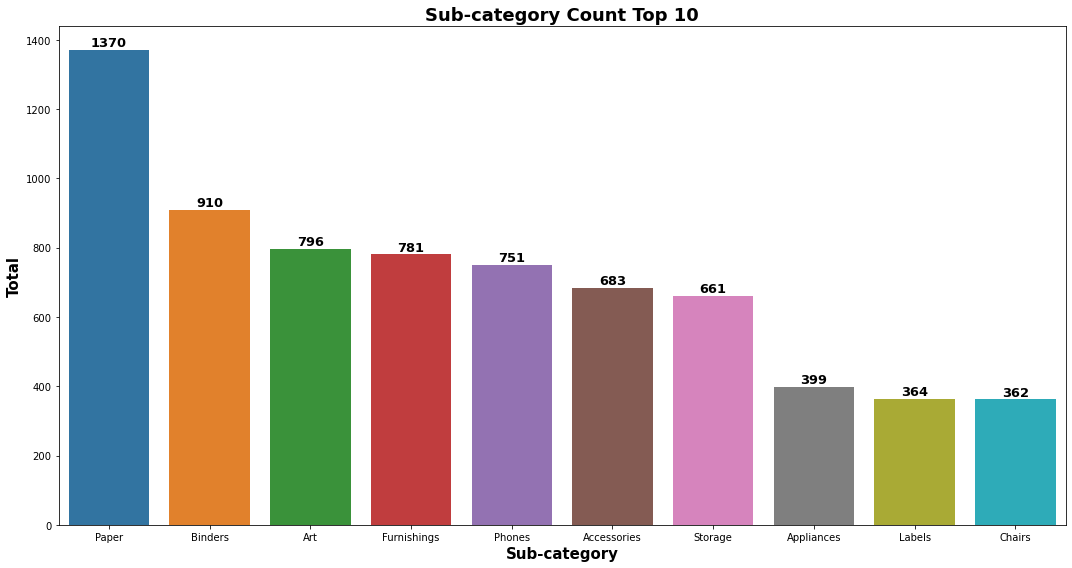

In [37]:
barplot_analysis_dfPositiveProfit(data_col_category[7])

## Find the States that produce the profits

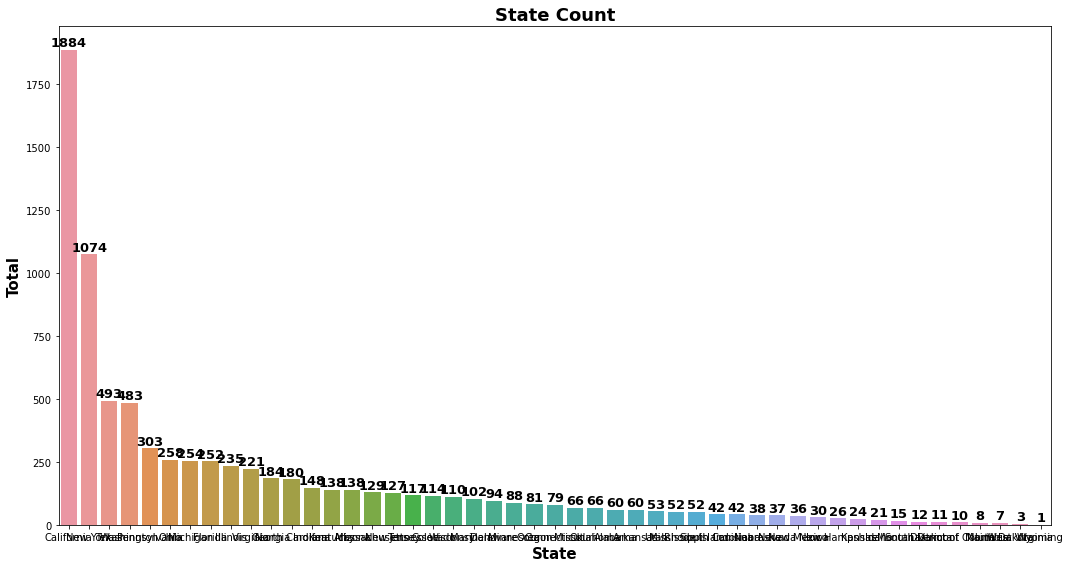

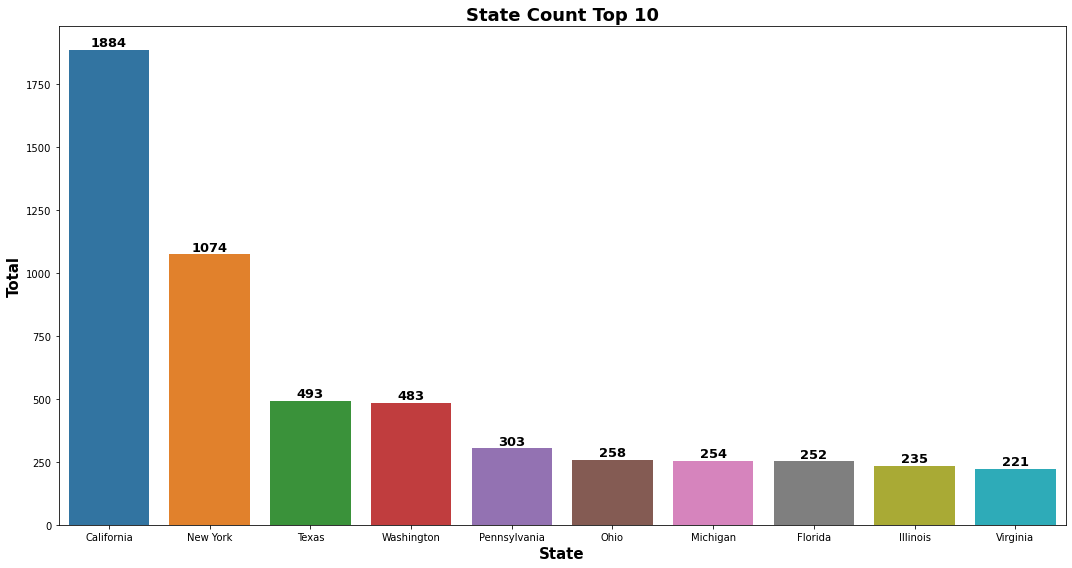

In [40]:
barplot_analysis_dfPositiveProfit(data_col_category[4])

## Customer Segmentation when profit condition

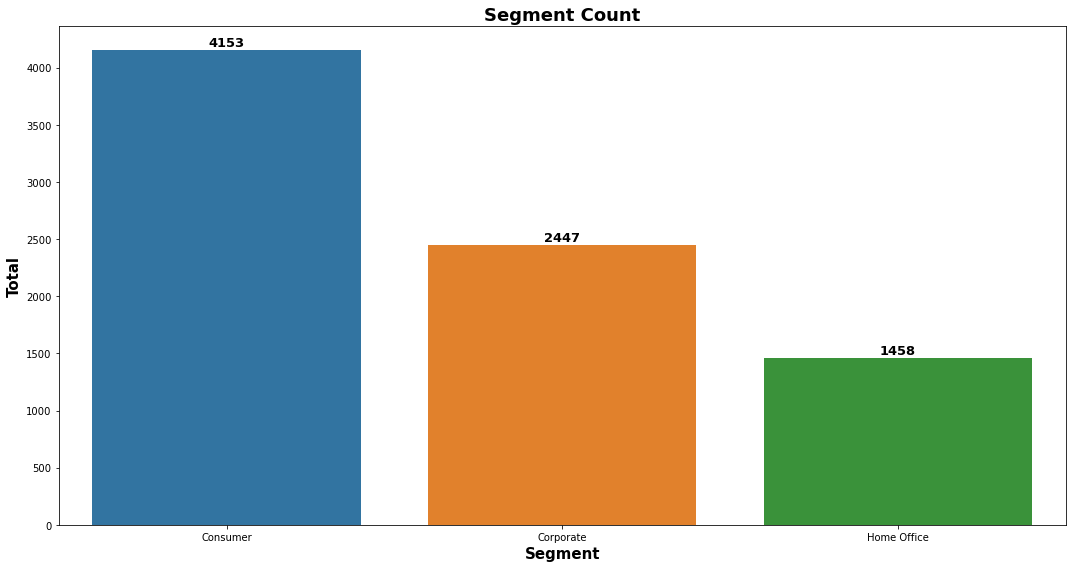

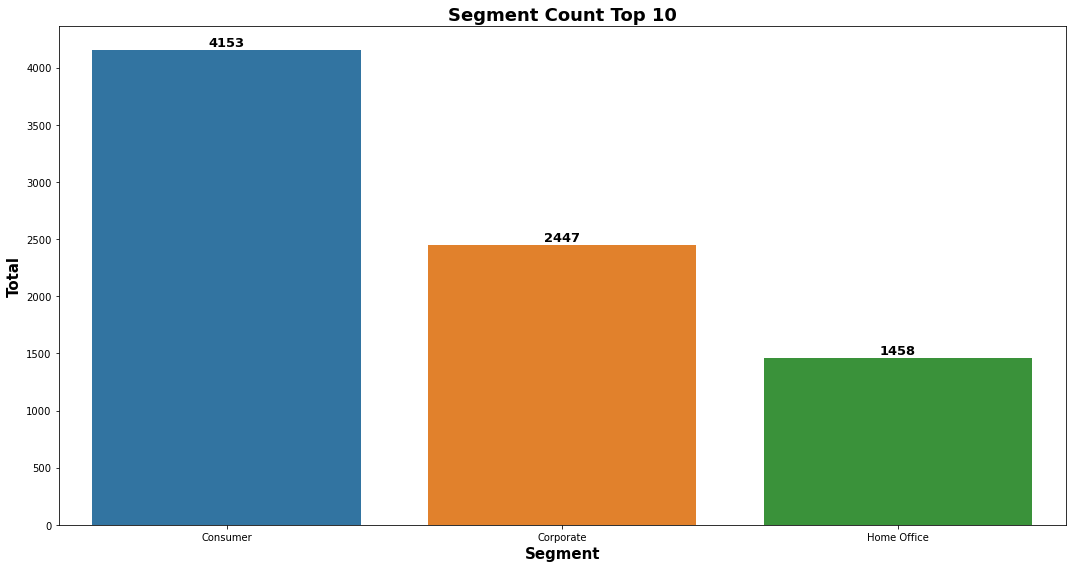

In [42]:
barplot_analysis_dfPositiveProfit(data_col_category[1])

## Ship mode that chose the most by customers when profit condition

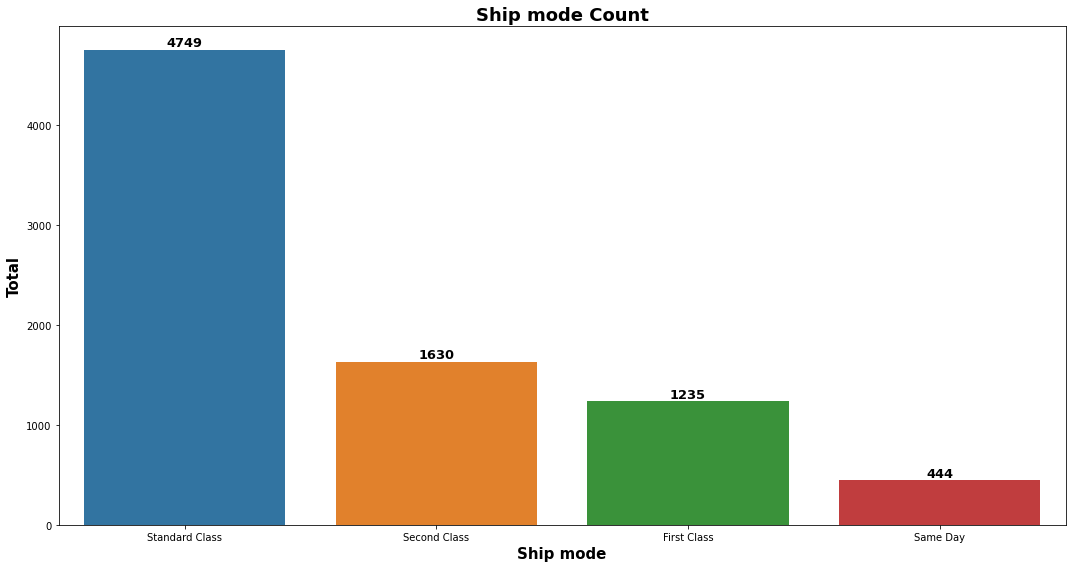

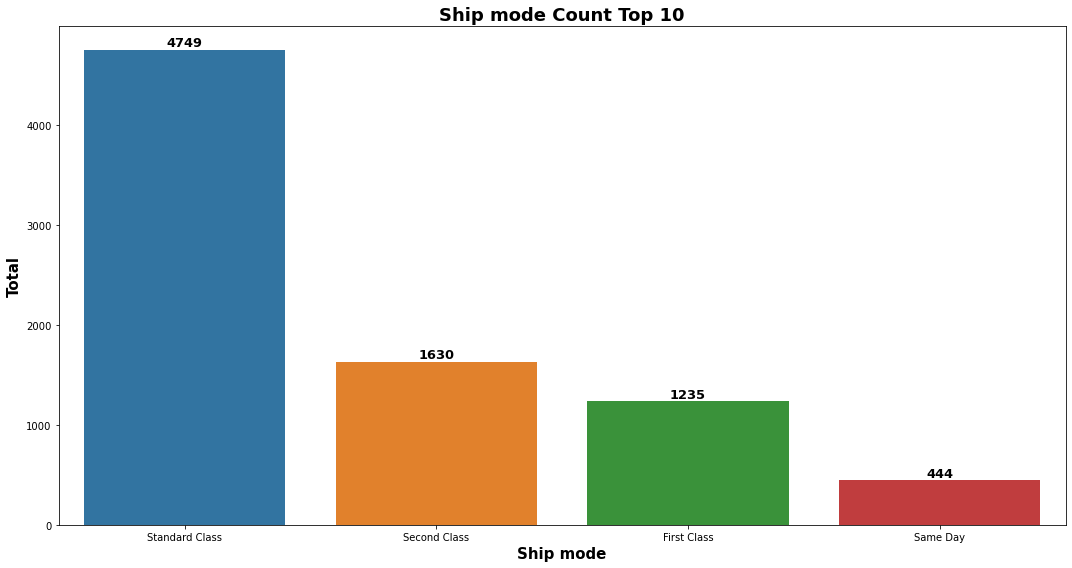

In [43]:
barplot_analysis_dfPositiveProfit(data_col_category[0])

## Quantity sales when profit condition

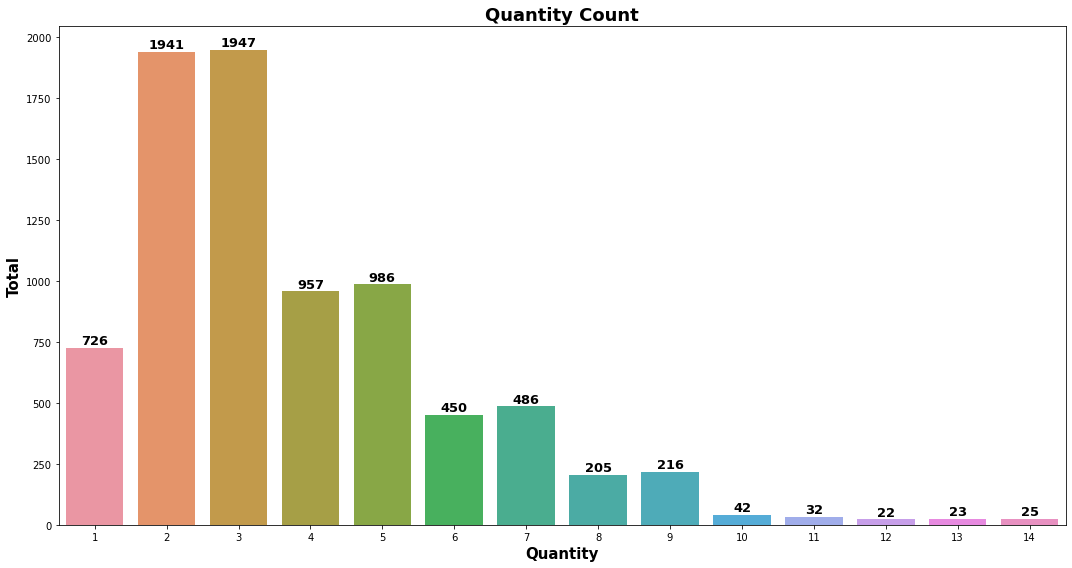

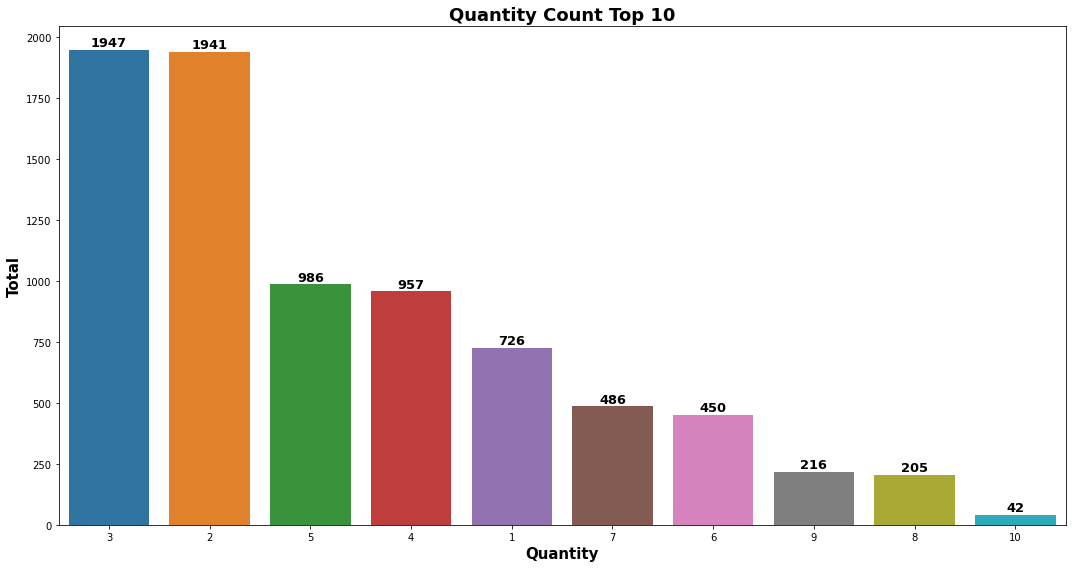

In [44]:
barplot_analysis_dfPositiveProfit(data_col_integer[1])

## Conclusion of Profit Condition

### Discount

**FACT**
1. In profit condition, despite of when the store don't give any discount(0.0 Discount), the most discount which produce profit the most is 0.2 or 20% discount, and the other option of discount which produce more profit is 0.1 or 10% discount

**SUGGESTION**
1. The other option of discount that we can try to produce more profit is 15%, 40%, and 30% discount. Because the more discount that gave to the customers, it will attract more customer to buy more the items. And also, it can make them happier

### Sub-Category

**FACT**
1. The most sub-category which sold the most is Paper, Binders, and Art. And the least sub-category which sold the least is Copiers, Machines, and Tables.

**SUGGESTION**
1. Based on the sub-category chart, strategy or suggestion that suitable to produce more profit to the store is **Give more discount to the sub-category that sold the least to increase the sales and profits. And give less discount to the sub-category that sold the most to maintain total sales which already good for now**. For example :
2. For sub-category **Copiers, Machines, and Tables will be given a 40% discount.** For **Bookcases, Supplies, and Fasteners will be given a 30% discount.** For **Envelopes, Chairs, Labels, and Appliances will be given a 15% discount**
3. For sub-category **Storage, Accessories, and Phones will be given a 20% discount.** For **Furnishings, Art, and Binders will be given a 10% discount.** And for Paper will not be given any discount because Paper already being the sold the most in the sub-category